# preprocessing
normalization research

## 1. 준비
최종 merge된 dataframe을 사용

In [2]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
%matplotlib inline

In [41]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.67,4.96,36.71,6.78,13.24,7.92,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.41,5.85,46.30,7.95,14.79,8.86,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.07,4.87,38.70,6.54,11.28,6.45,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.48,4.12,37.41,6.09,9.69,5.47,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.77,2.27,24.91,3.40,5.77,3.15,188031835,31828104


## 2. Plots

### 2-1. 기본적인 데이터 분포 파악

In [78]:
plt.rcParams['figure.figsize'] = (18.0, 10.0)

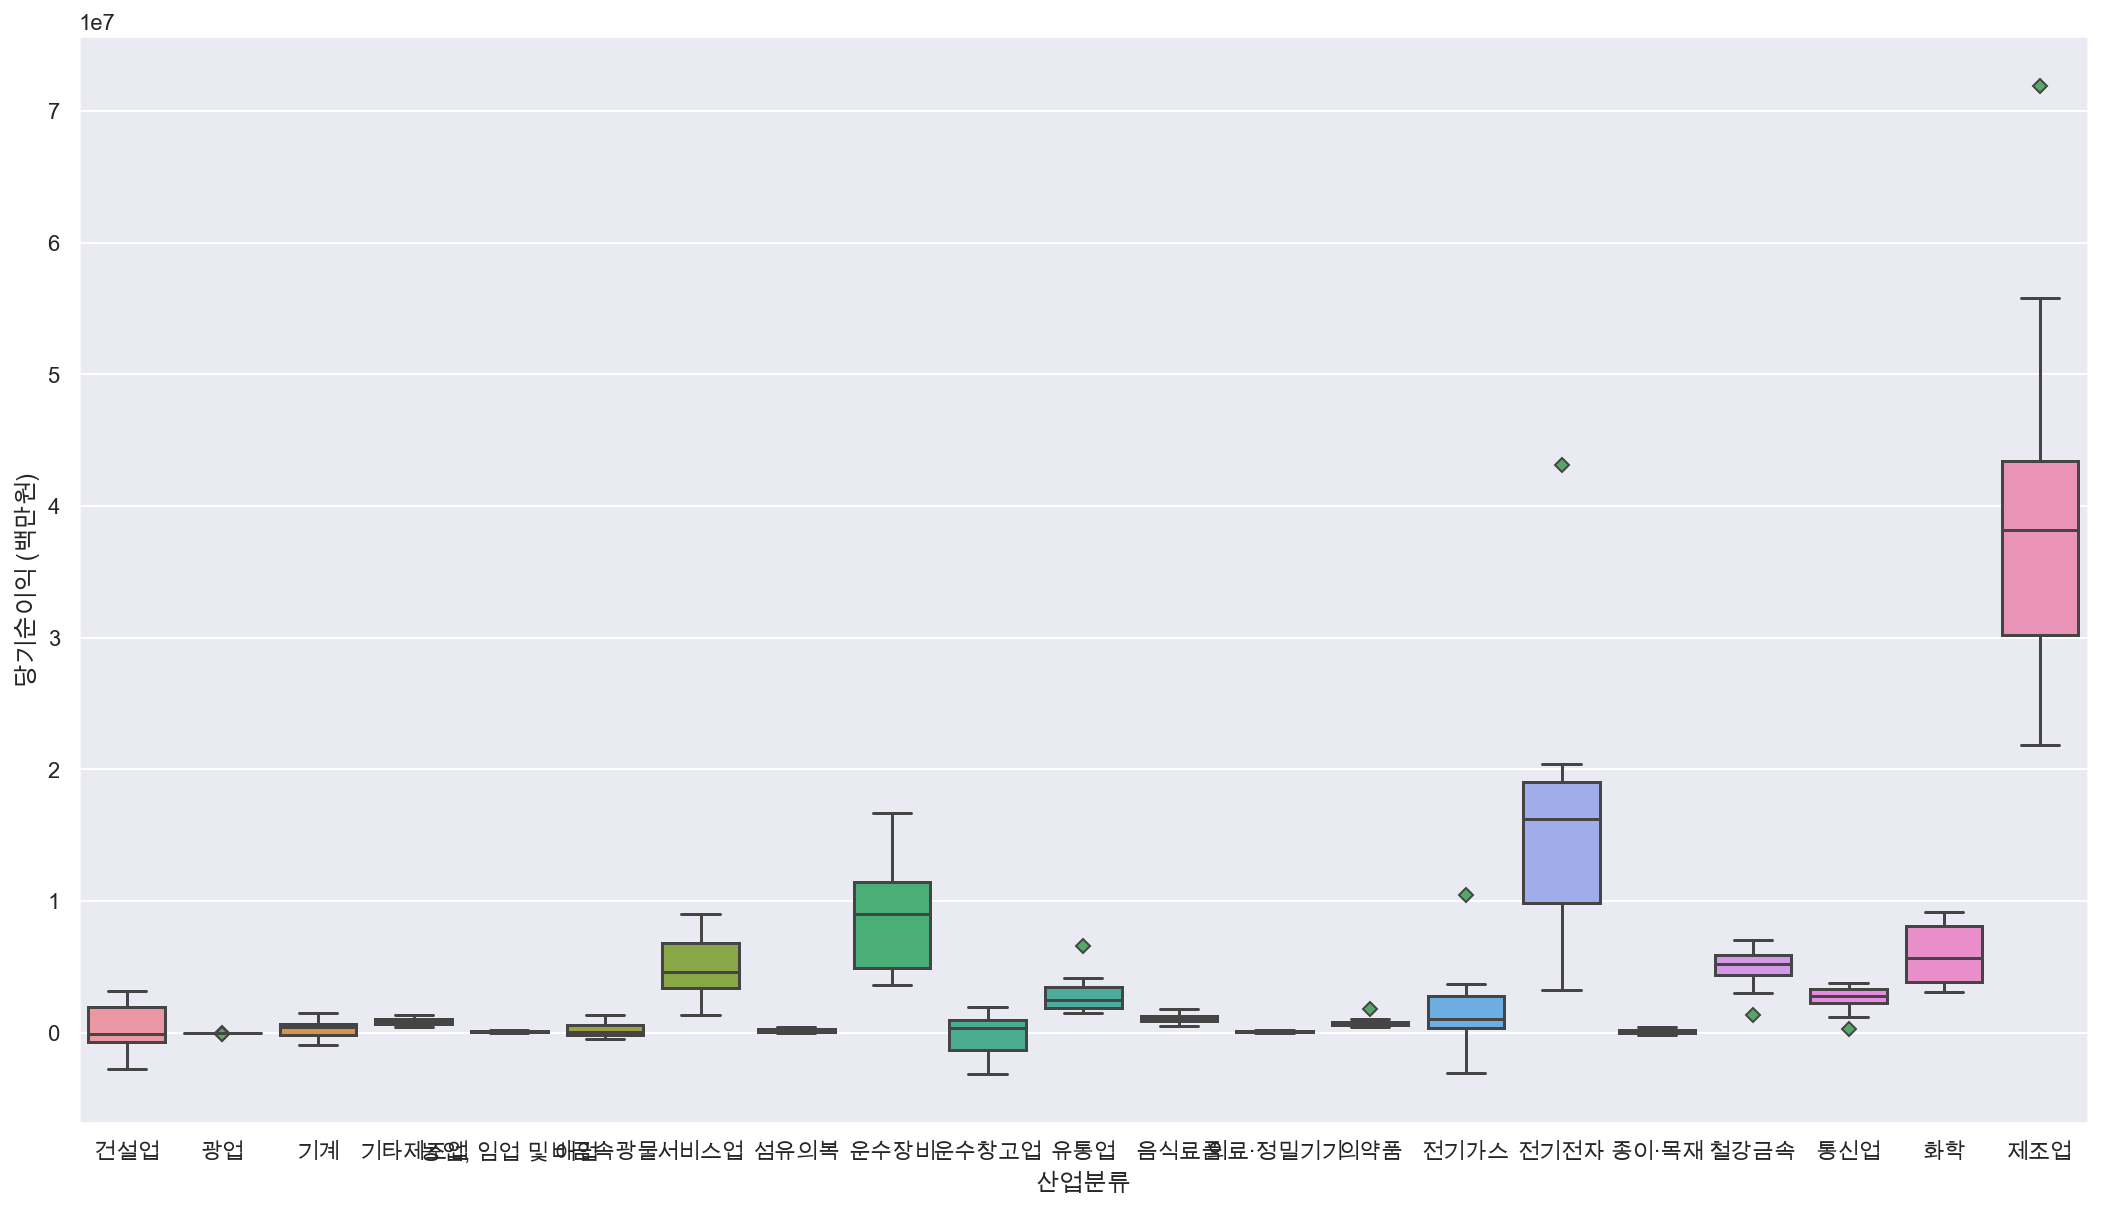

In [5]:
plt.figure(figsize=(18,10))
sns.boxplot(x="산업분류", y="당기순이익 (백만원)", data=df, flierprops={'markerfacecolor':'g', 'marker':'D'})
plt.show()

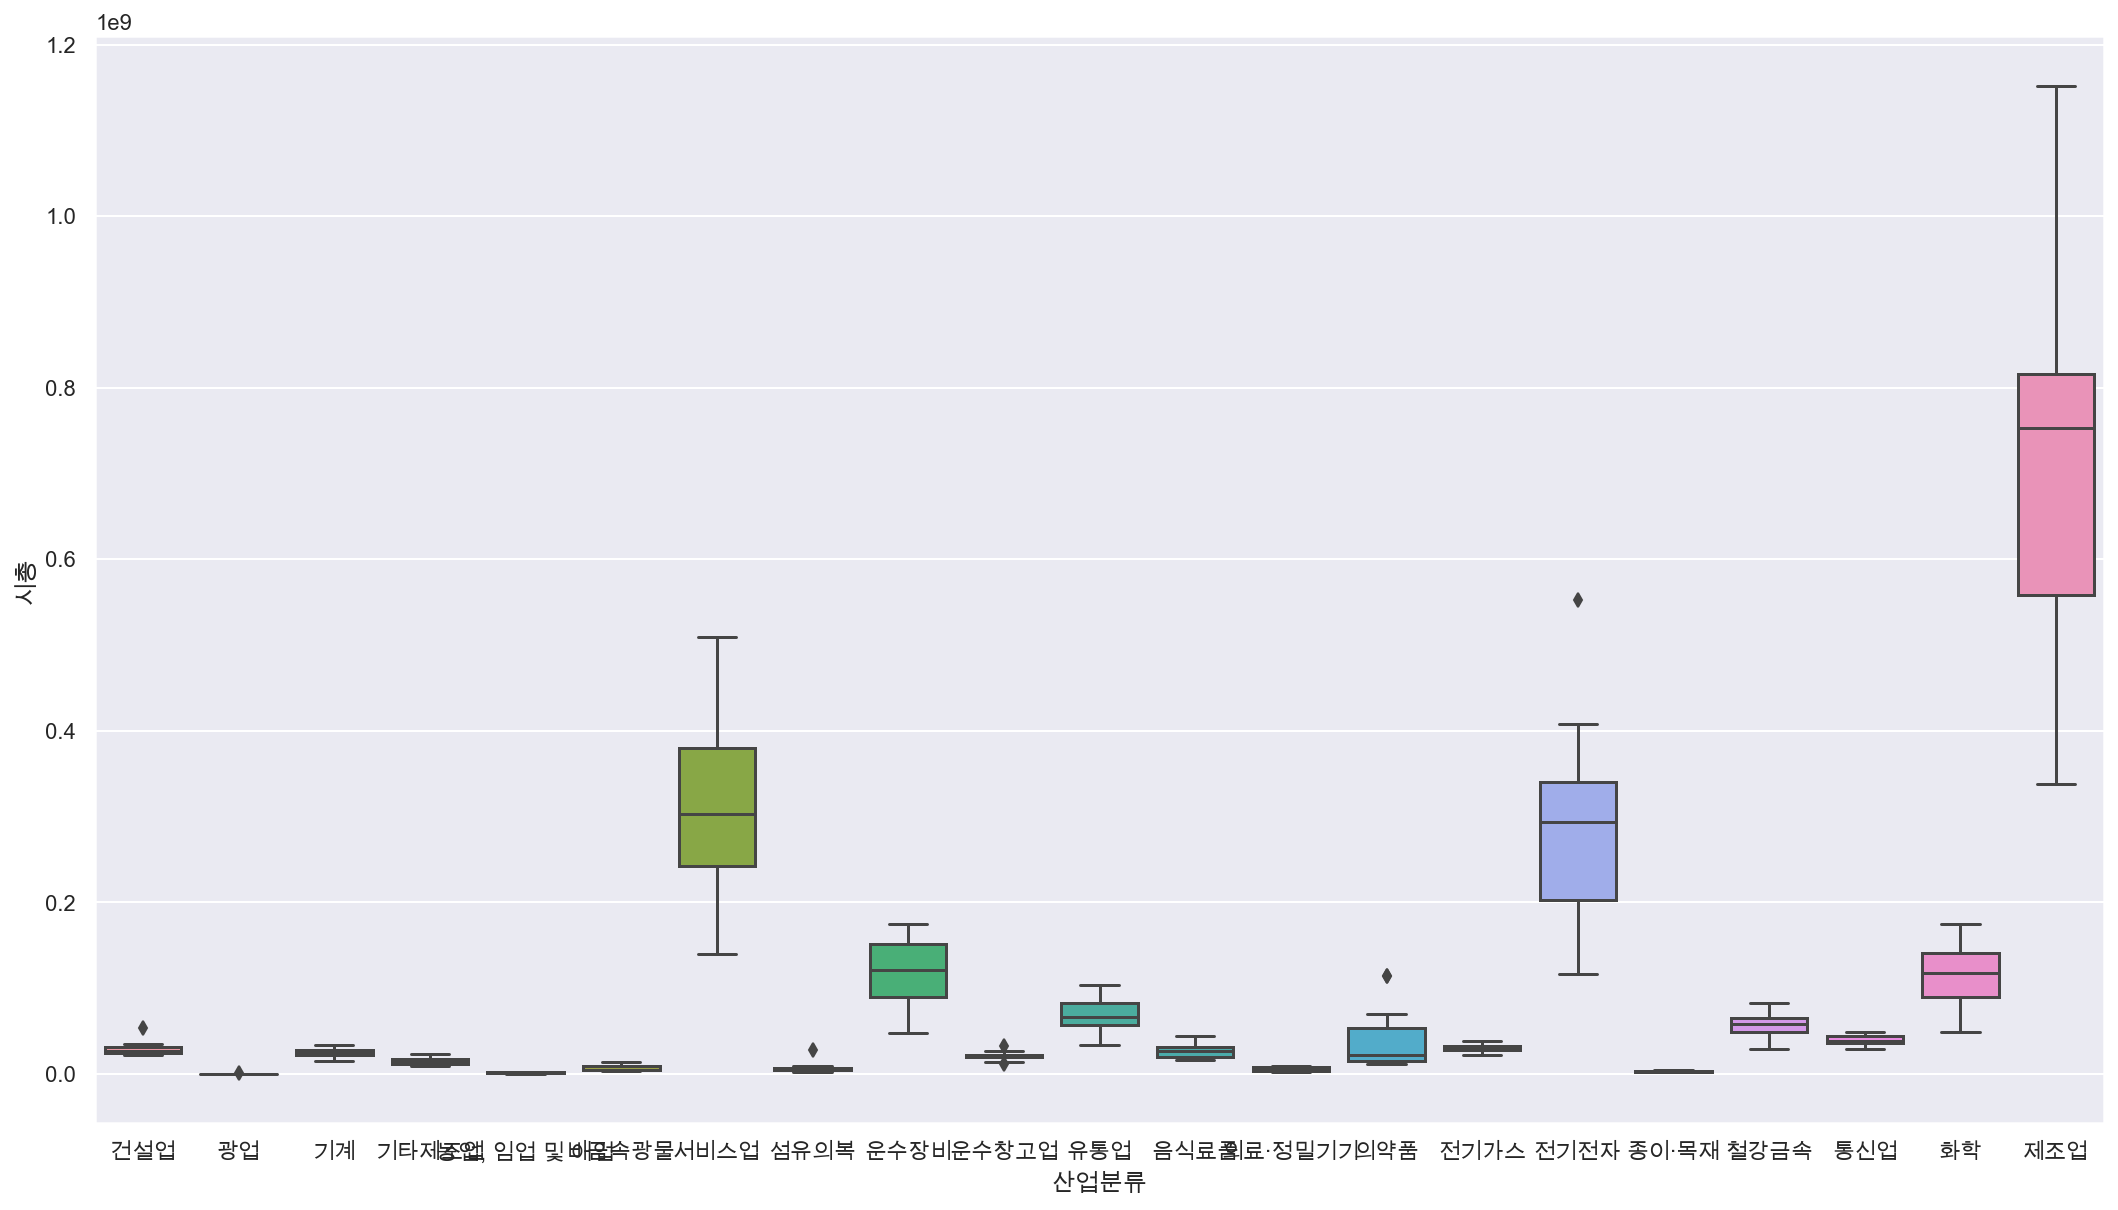

In [6]:
plt.figure(figsize=(18,10))
sns.boxplot(x="산업분류", y="시총", data=df)
plt.show()

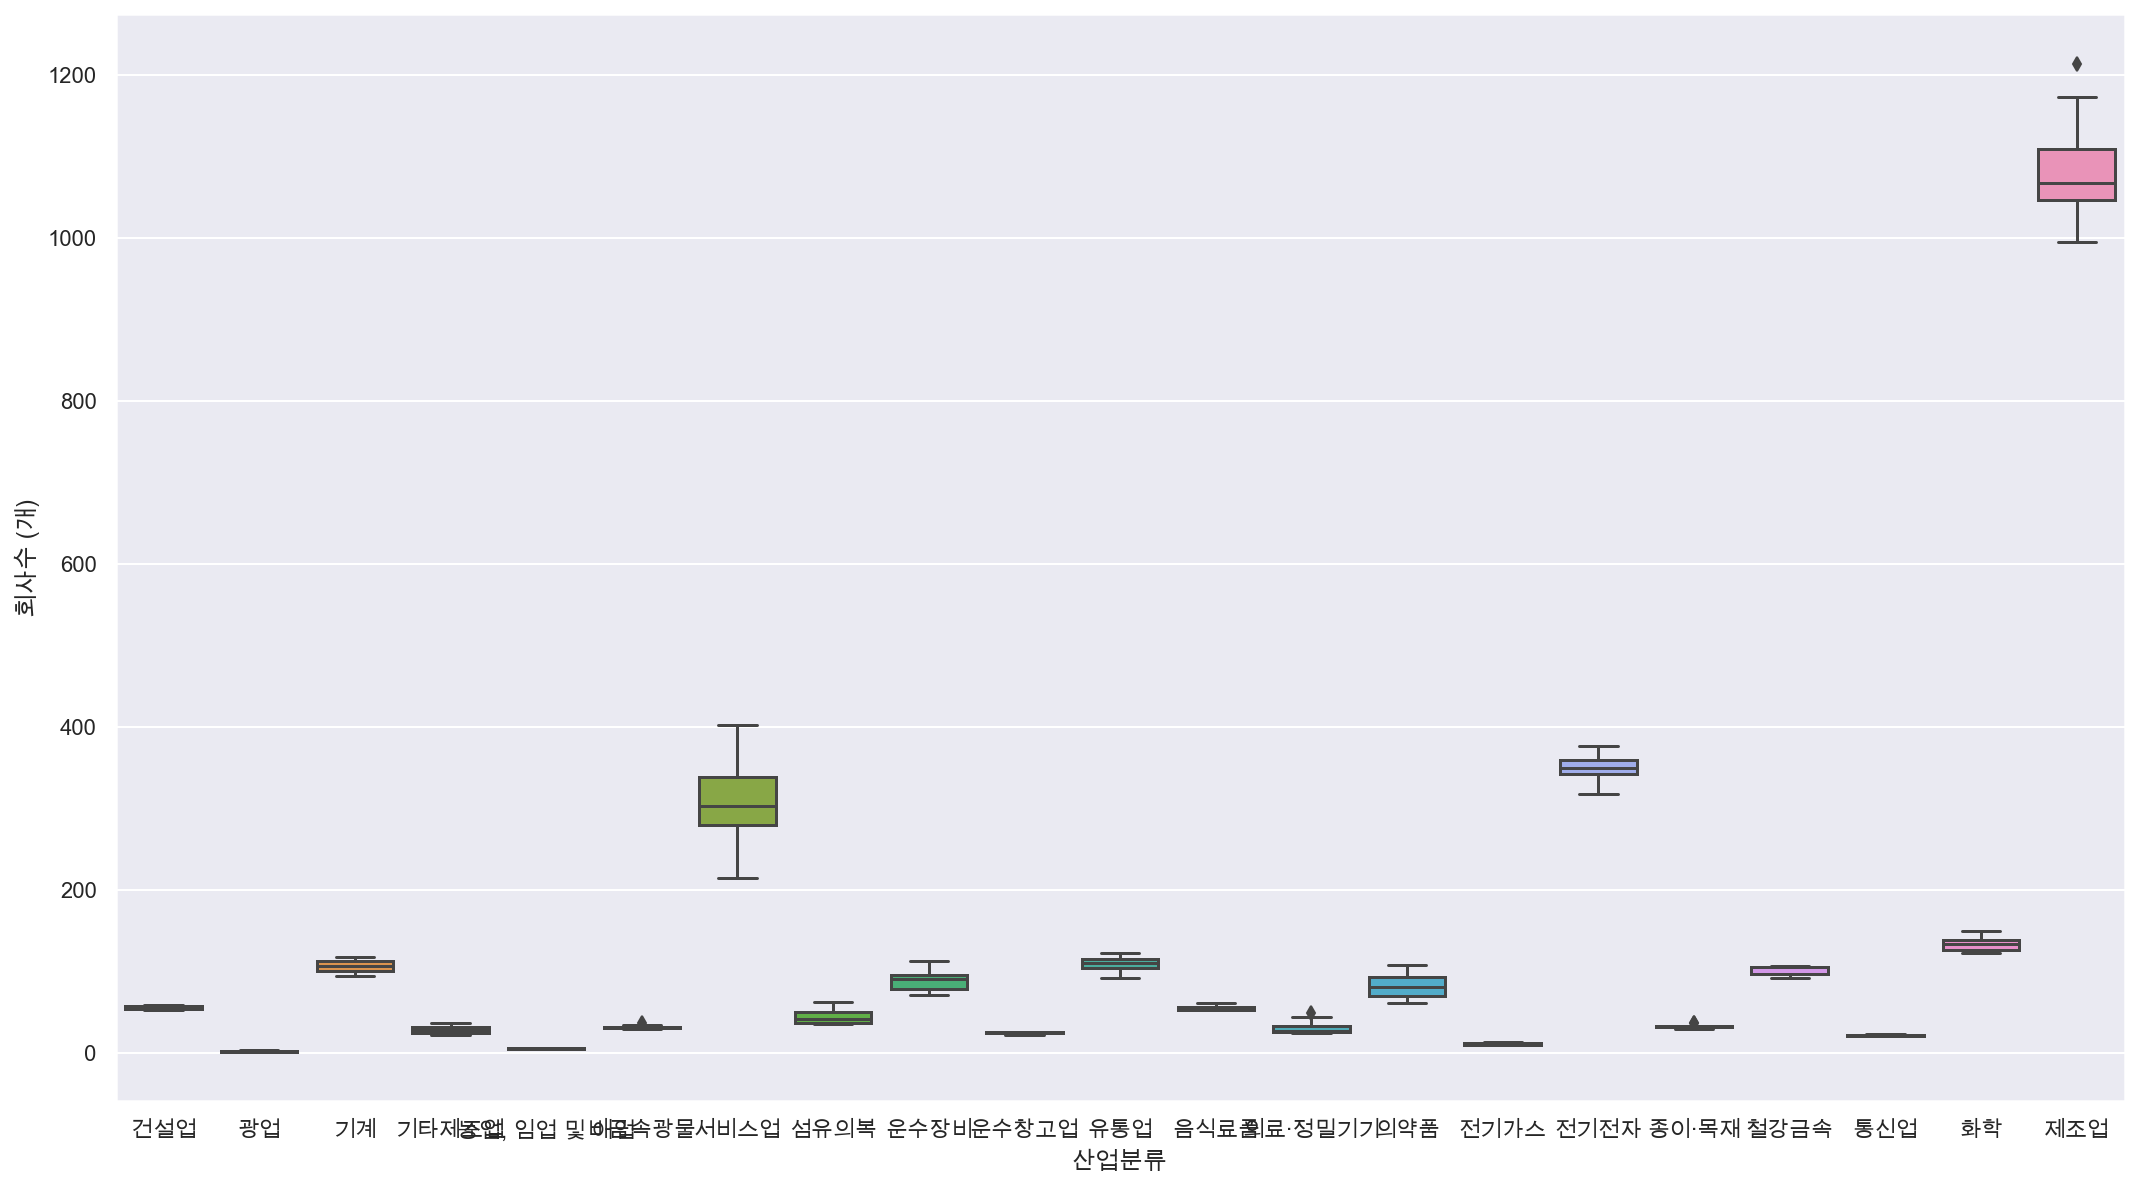

In [7]:
plt.figure(figsize=(18,10))
sns.boxplot(x="산업분류", y="회사수 (개)", data=df)
plt.show()

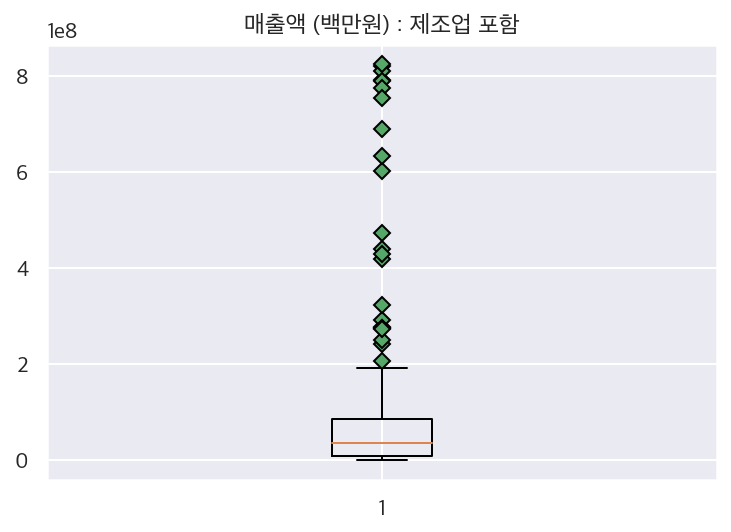

In [74]:
plt.boxplot(df['매출액 (백만원)'], flierprops={'markerfacecolor':'g', 'marker':'D'})
plt.title("매출액 (백만원) : 제조업 포함")
plt.show();

제조업의 경우 데이터 값의 범위가 다른 산업에 비해 큼.

전처리 과정에서 다량의 하위 산업분류를 더하여 만들다 보니 생긴 비대칭으로 판단.

### 2-2. 제조업을 제외한 df 생성

In [8]:
df_no_manuf = df[df['산업분류'] != '제조업']
df_no_manuf['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학'], dtype=object)

In [12]:
df_no_manuf.columns

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [71]:
df.describe()

,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
count,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00,294.00
mean,2011.50,128.77,81266122.52,4310249.78,5375360.88,5412980.83,6.34,1.50,35.71,2.65,3.10,3.03,231549175.64,90968936.14
std,4.04,232.42,147121372.49,9427836.37,11038478.75,11692202.00,12.81,11.80,47.52,15.90,7.96,4.73,389328145.72,172449762.21
min,2005.00,1.00,9905.00,-3131102.00,-2790523.00,-3773457.00,-54.67,-101.61,-246.01,-192.49,-80.36,-41.37,13498180.00,17704.00
25%,2008.00,25.25,7161036.50,111429.75,373831.00,166896.75,-0.02,0.85,11.07,1.81,1.27,1.59,52086239.75,7914608.50
50%,2011.50,54.00,34770499.00,1000424.50,1629593.00,1353361.50,5.77,2.99,36.48,4.13,4.25,3.36,104426490.50,27630518.50
75%,2015.00,107.00,84434307.50,3964591.75,5242241.25,4930909.00,12.52,4.95,58.25,6.81,6.91,5.25,185912925.00,71606588.25
max,2018.00,1214.00,824698749.00,71941760.00,83499912.00,86557629.00,71.08,19.77,245.78,48.33,16.56,16.45,1999044945.00,1152141771.00


In [72]:
df_no_manuf.describe()

,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
count,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00
mean,2011.50,80.96,52252475.04,2573465.31,3291910.55,3235570.81,6.28,1.41,35.40,2.53,3.05,2.99,174817554.00,60208279.91
std,4.04,91.60,61637157.41,4648512.65,5209440.00,5720603.61,13.09,12.08,48.59,16.28,8.15,4.84,296737419.66,94134483.56
min,2005.00,1.00,9905.00,-3131102.00,-2790523.00,-3773457.00,-54.67,-101.61,-246.01,-192.49,-80.36,-41.37,13498180.00,17704.00
25%,2008.00,25.00,7029253.00,102121.75,325269.50,159103.75,-0.31,0.67,10.26,1.70,1.08,1.49,51231823.50,7135666.00
50%,2011.50,52.00,31331720.00,868956.50,1454992.00,1196967.00,5.63,2.91,35.61,4.03,4.21,3.27,100558517.50,26089872.50
75%,2015.00,105.00,73508865.75,3425192.75,4480067.50,4522048.75,12.64,5.16,58.92,7.06,7.05,5.30,174977898.75,62009428.25
max,2018.00,402.00,322078272.00,43096388.00,53484228.00,54785449.00,71.08,19.77,245.78,48.33,16.56,16.45,1999044945.00,552931593.00


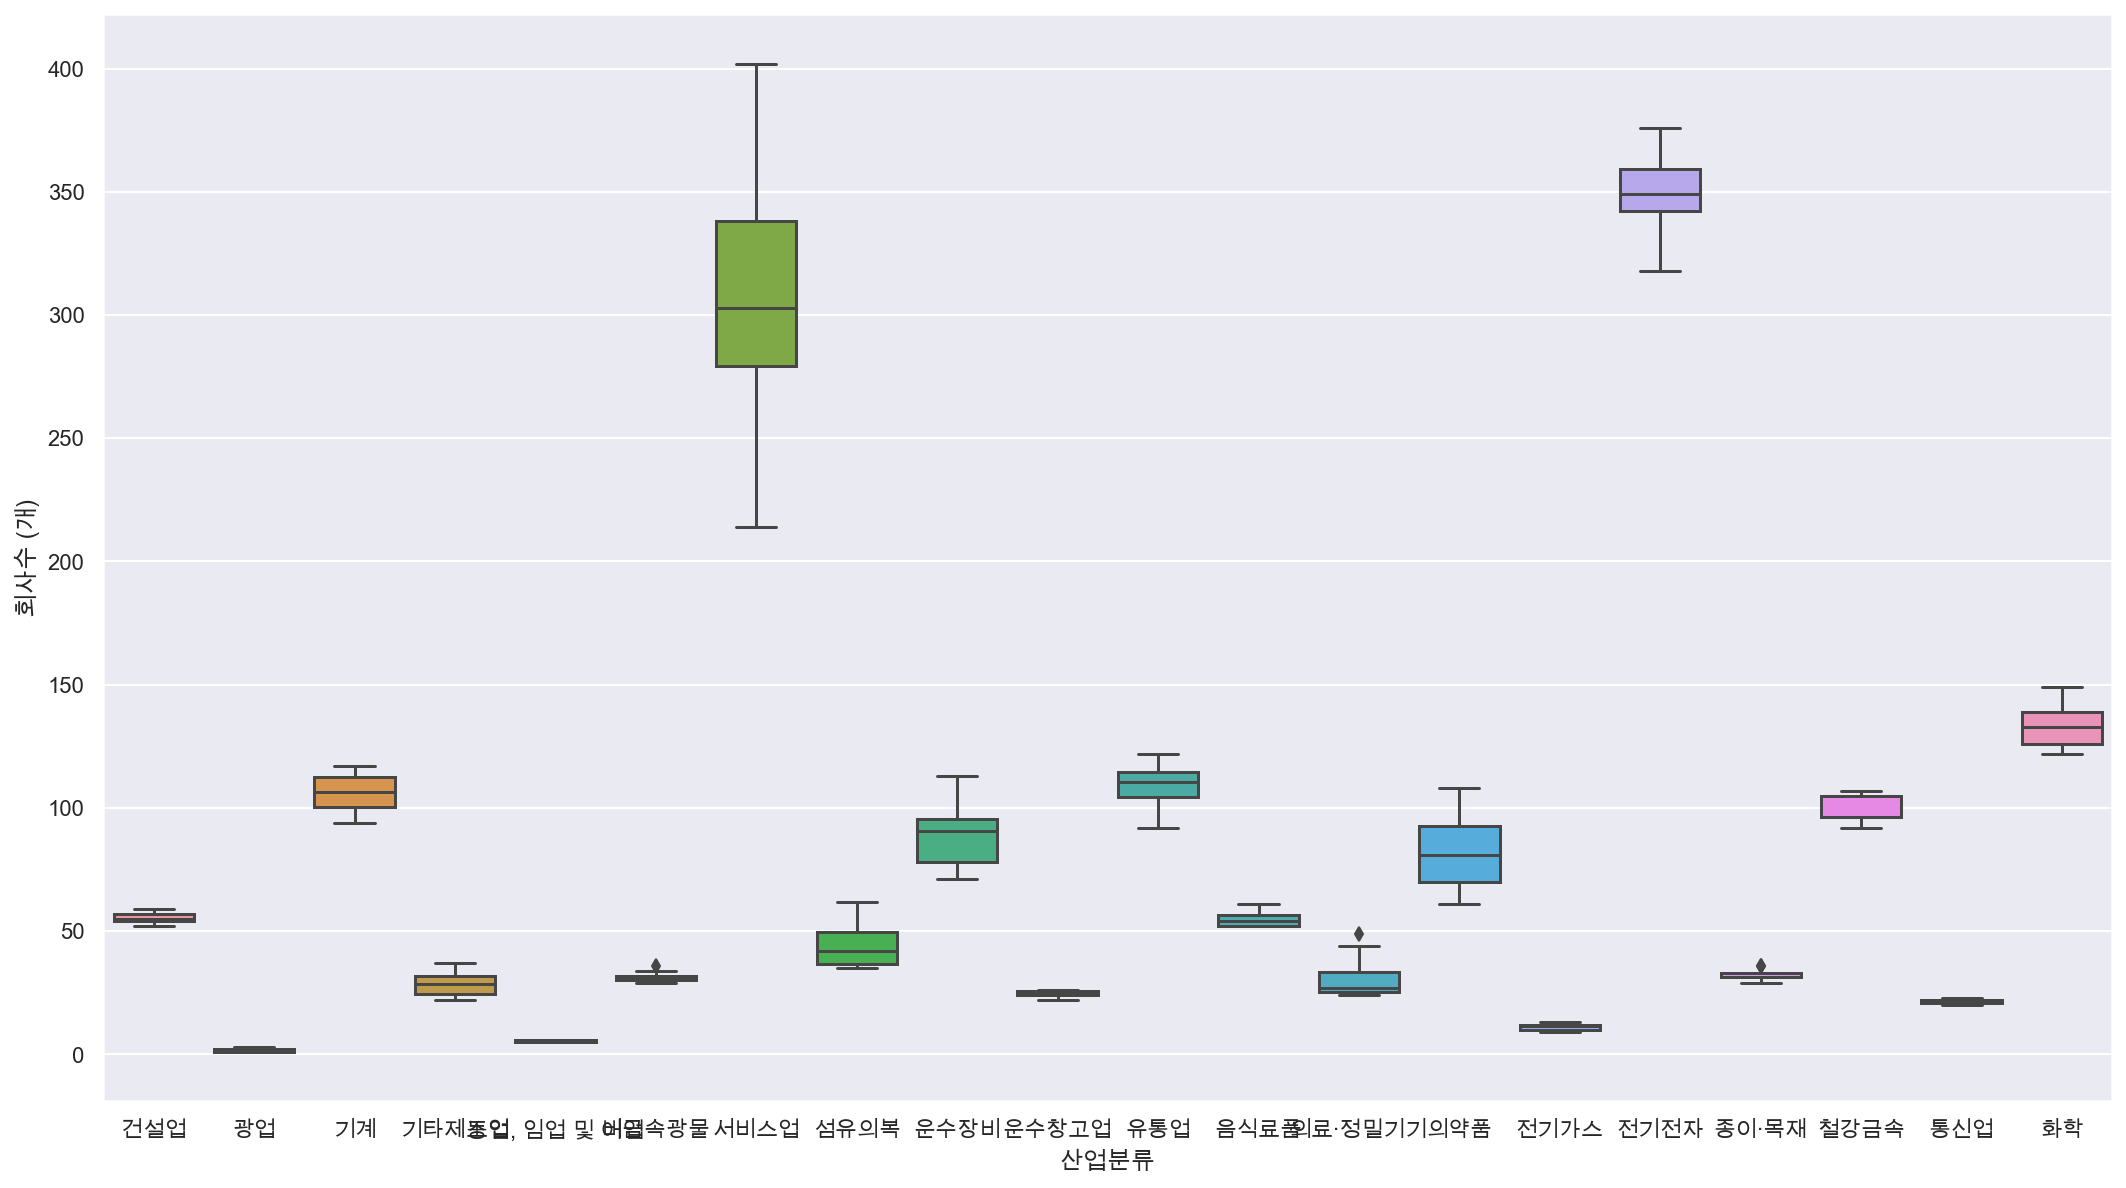

In [73]:
plt.figure(figsize=(18,10))
sns.boxplot(x="산업분류", y="회사수 (개)", data=df_no_manuf)
plt.show()

서비스업의 회사수 변화가 다른 심함을 볼 수 있다

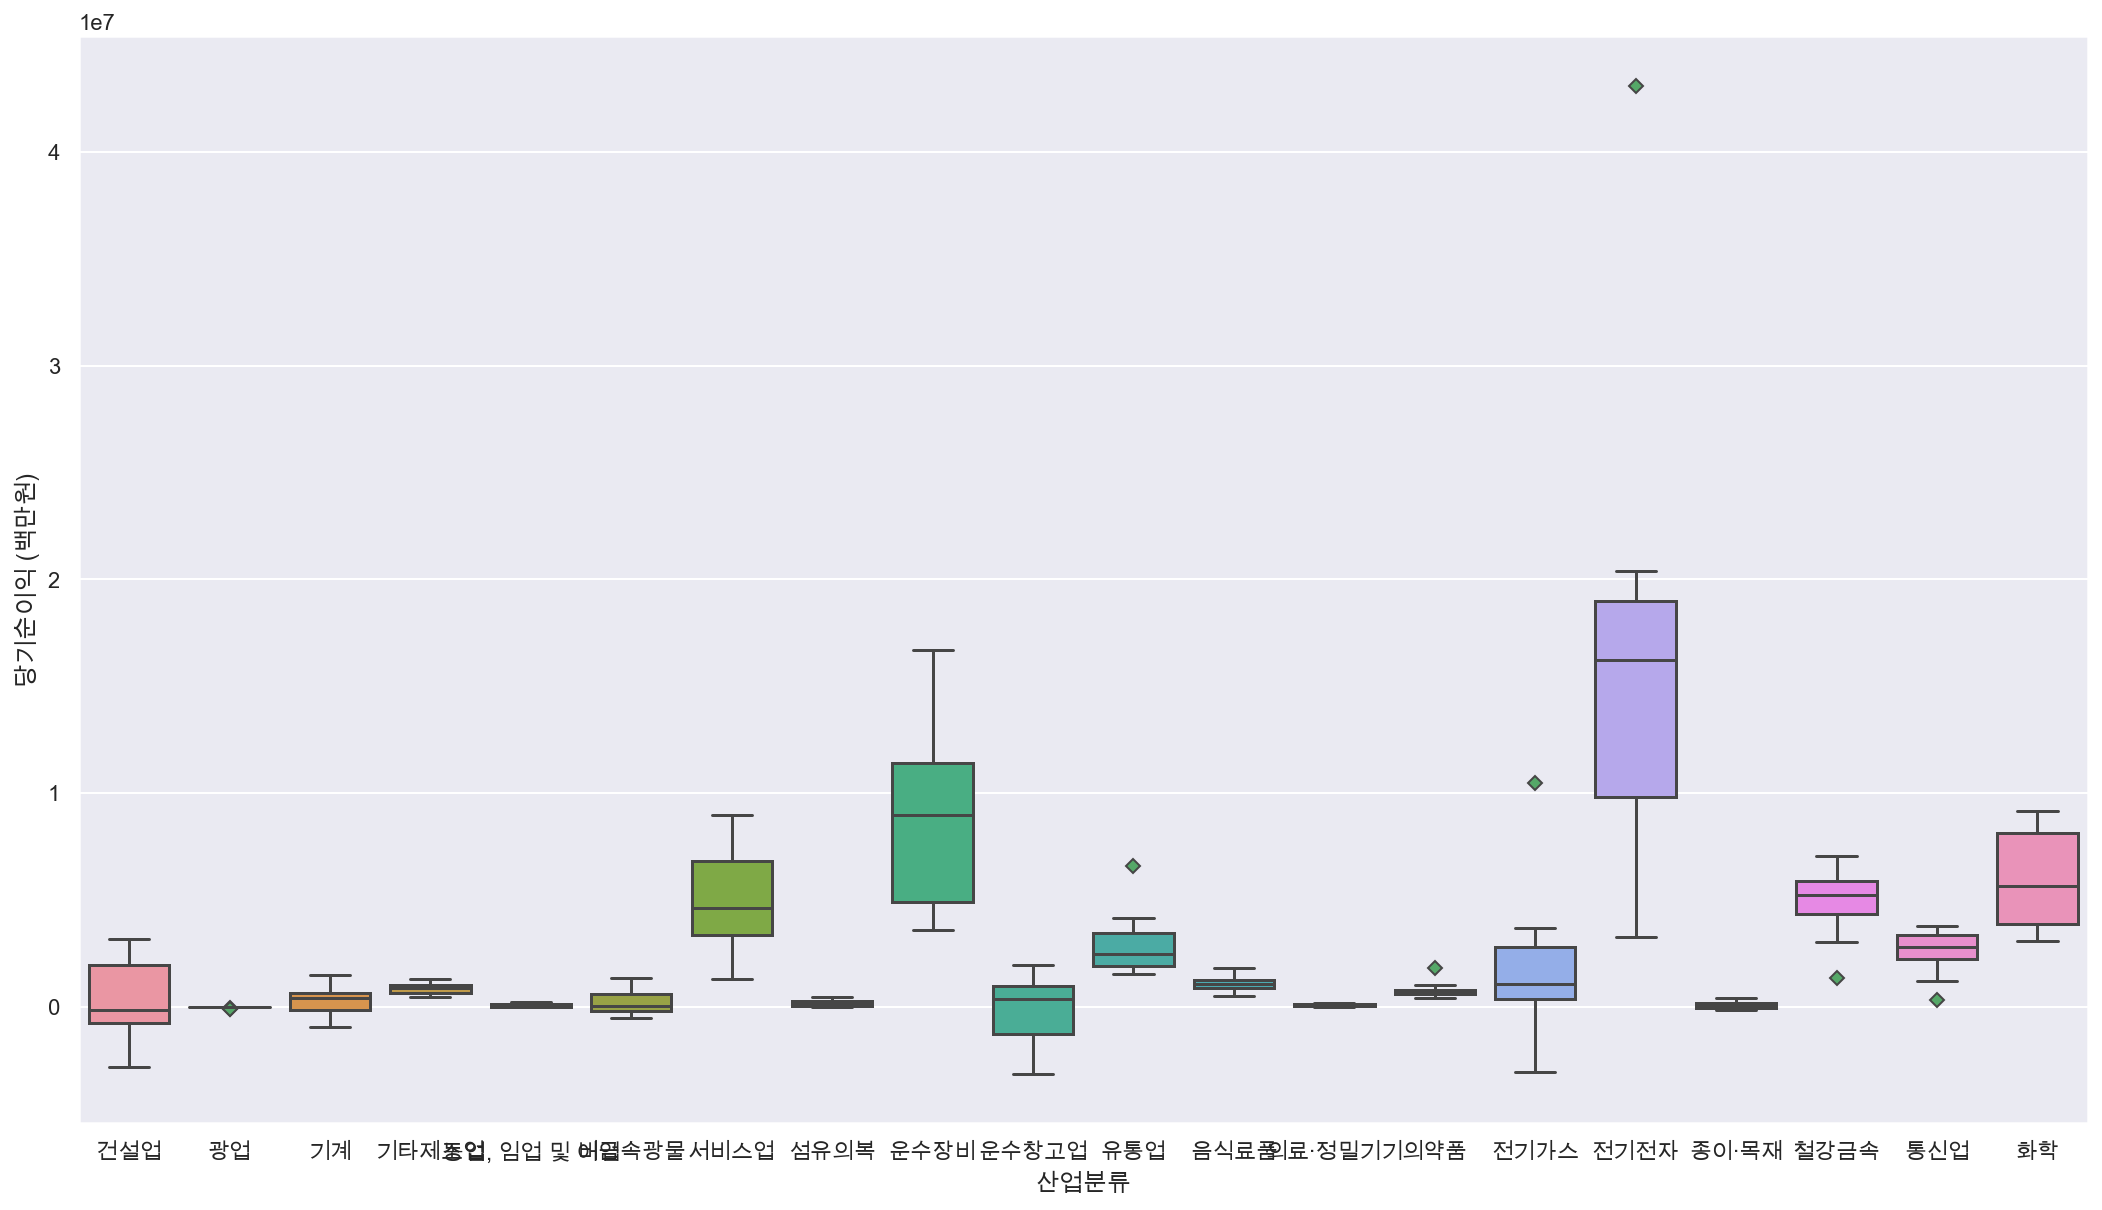

In [74]:
plt.figure(figsize=(18,10))
sns.boxplot(x="산업분류", y="당기순이익 (백만원)", data=df_no_manuf, flierprops={'markerfacecolor':'g', 'marker':'D'})
plt.show()

In [134]:
df_nm_pivot_income = df_no_manuf.pivot('년도','산업분류','당기순이익 (백만원)')
df_nm_pivot_income.head(2)

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,유통업,음식료품,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,
2005,2029565,2583,631167,449654,28638,356548,1313525,-560,4046959,1982781,1530158,994995,27294,419164,3360360,16563572,163911,6000172,3261790,5806567
2006,2755247,-74404,556865,518790,1116,107613,1625924,101044,4453287,1473399,1780914,860163,58967,462490,2879773,9770007,-39598,6141180,3794172,5487722


In [135]:
df_nm_pivot_tmp = df_nm_pivot_income.mean()
df_nm_pivot_tmp.sort_values(ascending=False, inplace=True)
df_nm_pivot_tmp = df_nm_pivot_tmp.head(10)
df_income_top10 = list(df_nm_pivot_tmp.index)
df_income_top10

['전기전자', '운수장비', '화학', '서비스업', '철강금속', '유통업', '통신업', '전기가스', '음식료품', '기타제조업']

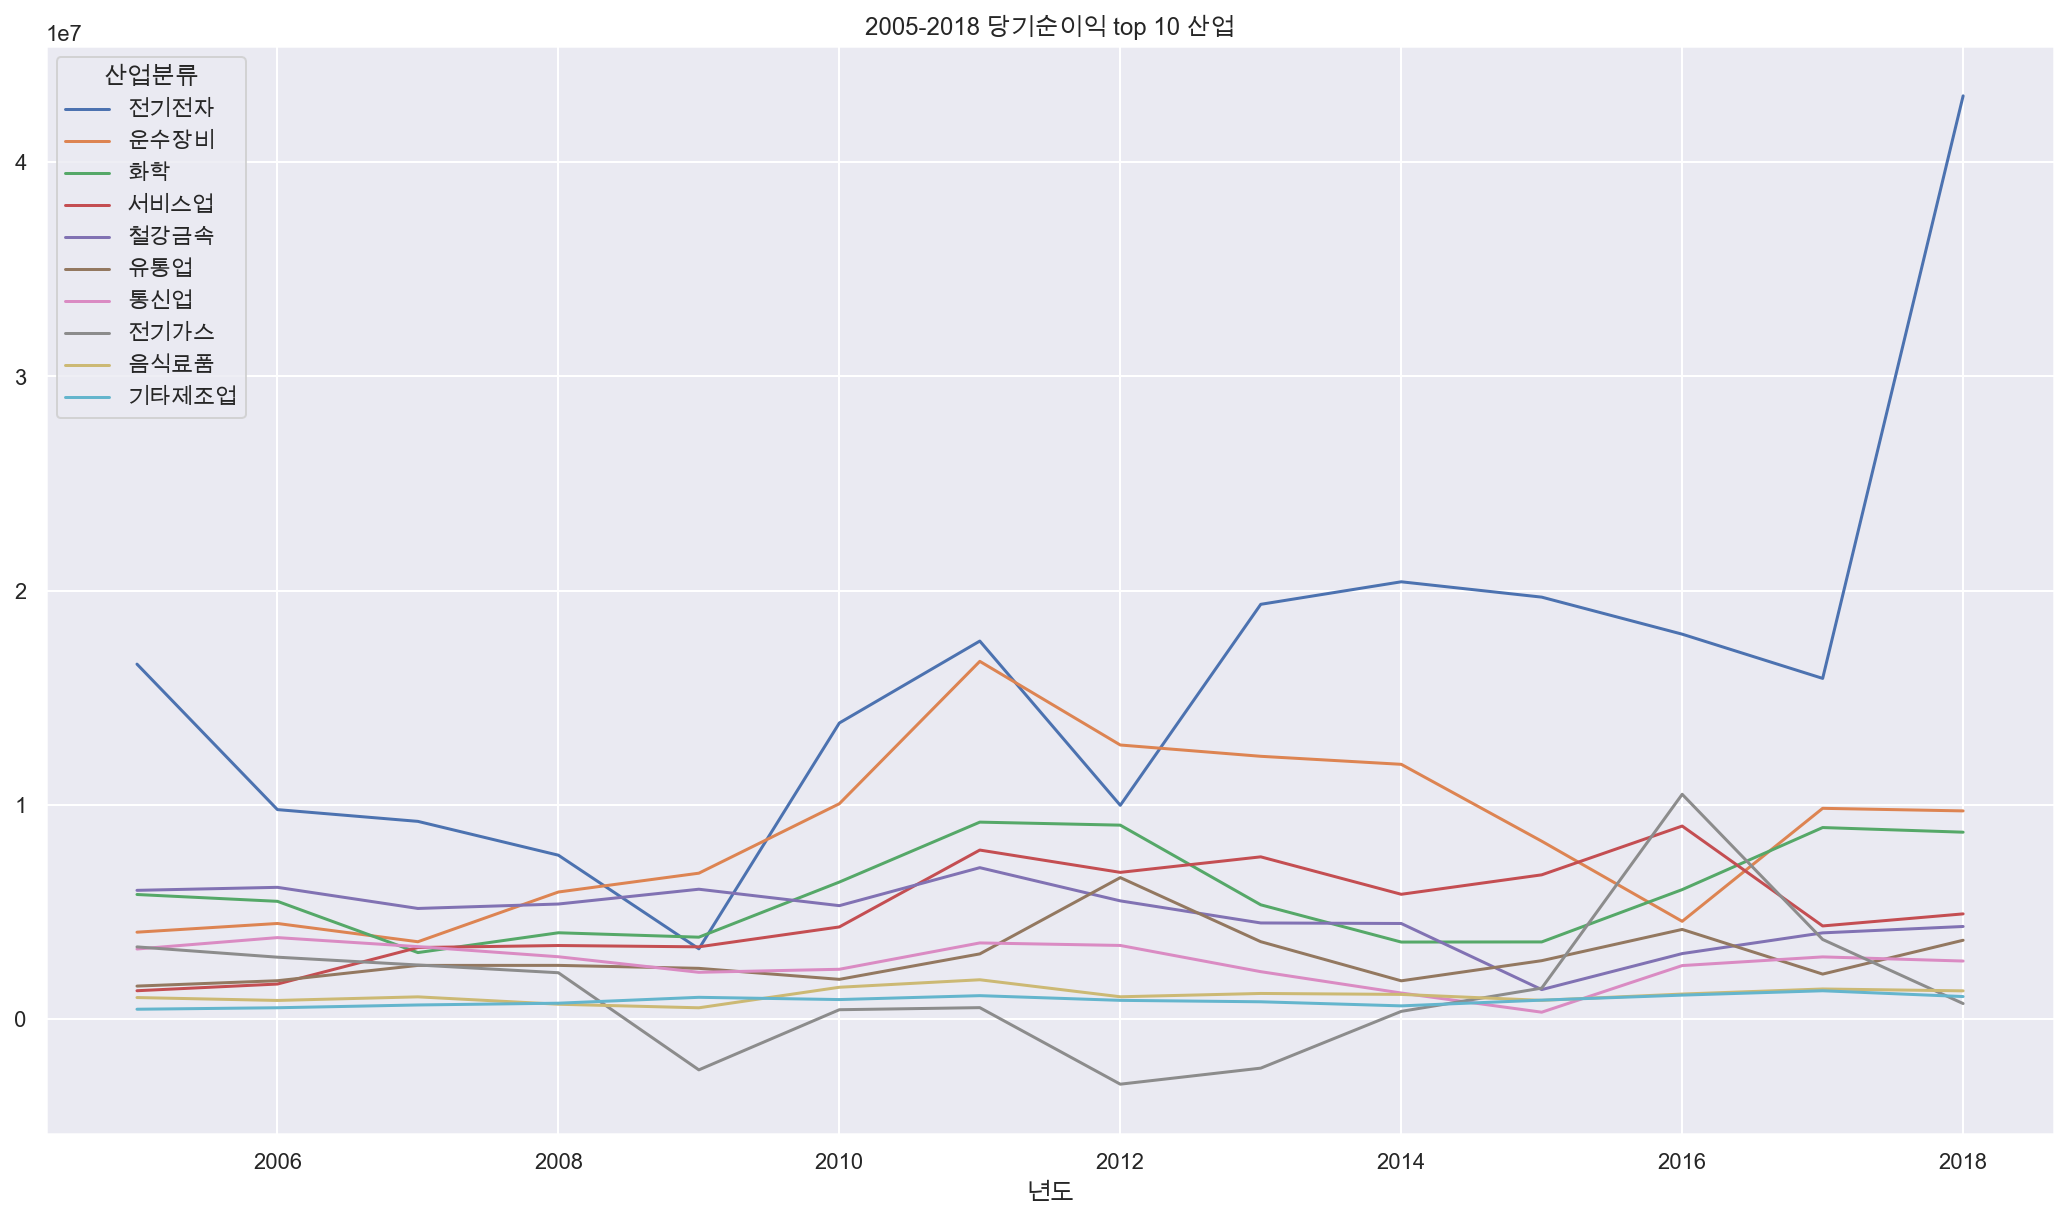

In [143]:
df_nm_pivot_income[df_income_top10].plot()
plt.title('2005-2018 당기순이익 top 10 산업');

대한민국 전기전자의 위엄..

#### 다양한 plot 그려보기

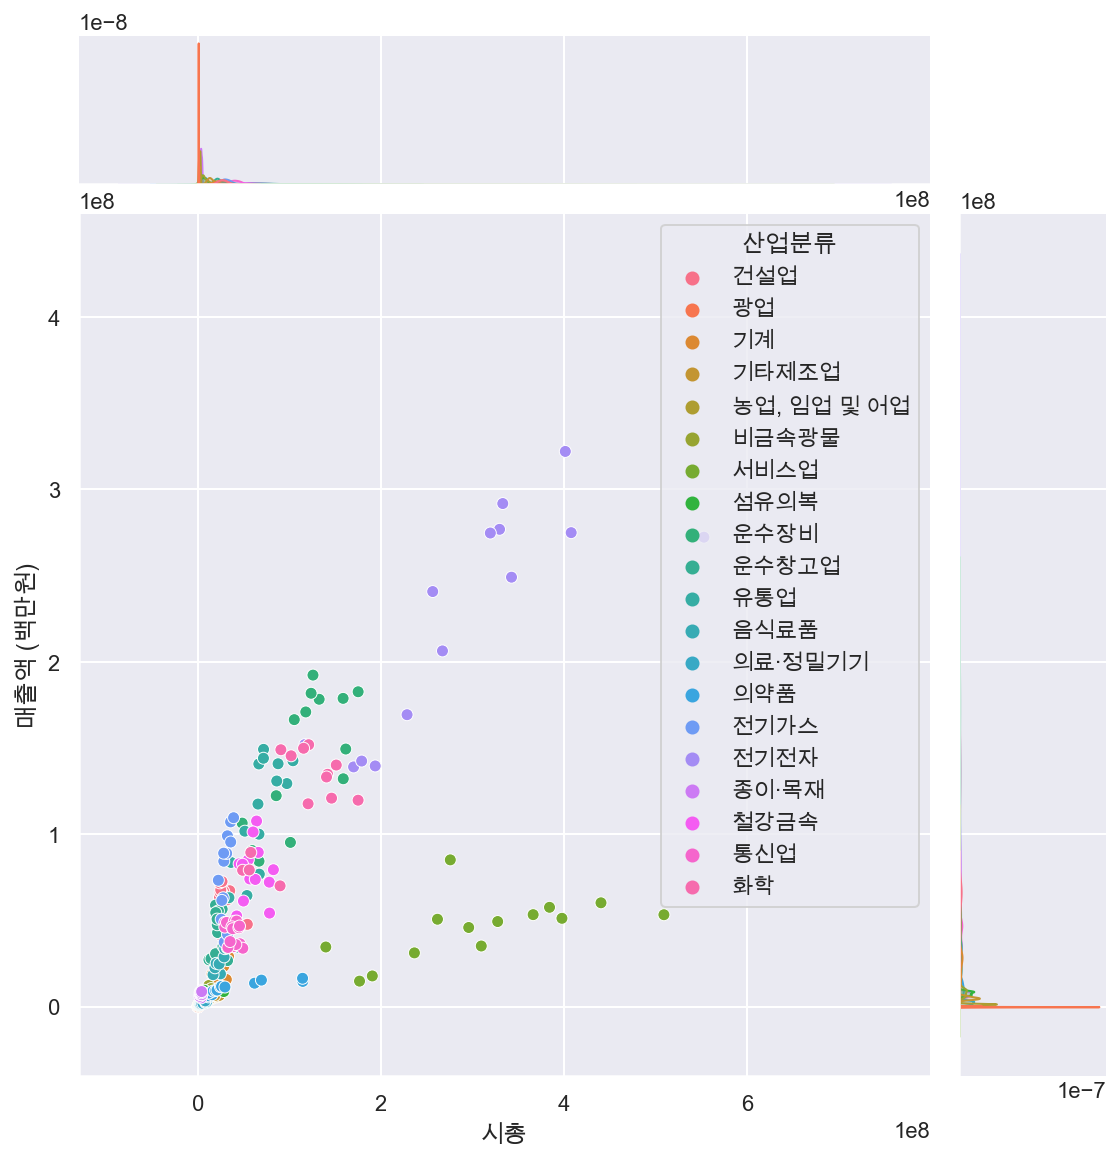

In [79]:
sns.jointplot(y='매출액 (백만원)',x='시총', hue='산업분류',data=df_no_manuf, height=8, legend='auto')
plt.show()

데이터에 따르면 서비스업은 시총에 비해 매출이 낮은 경향이 있다

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


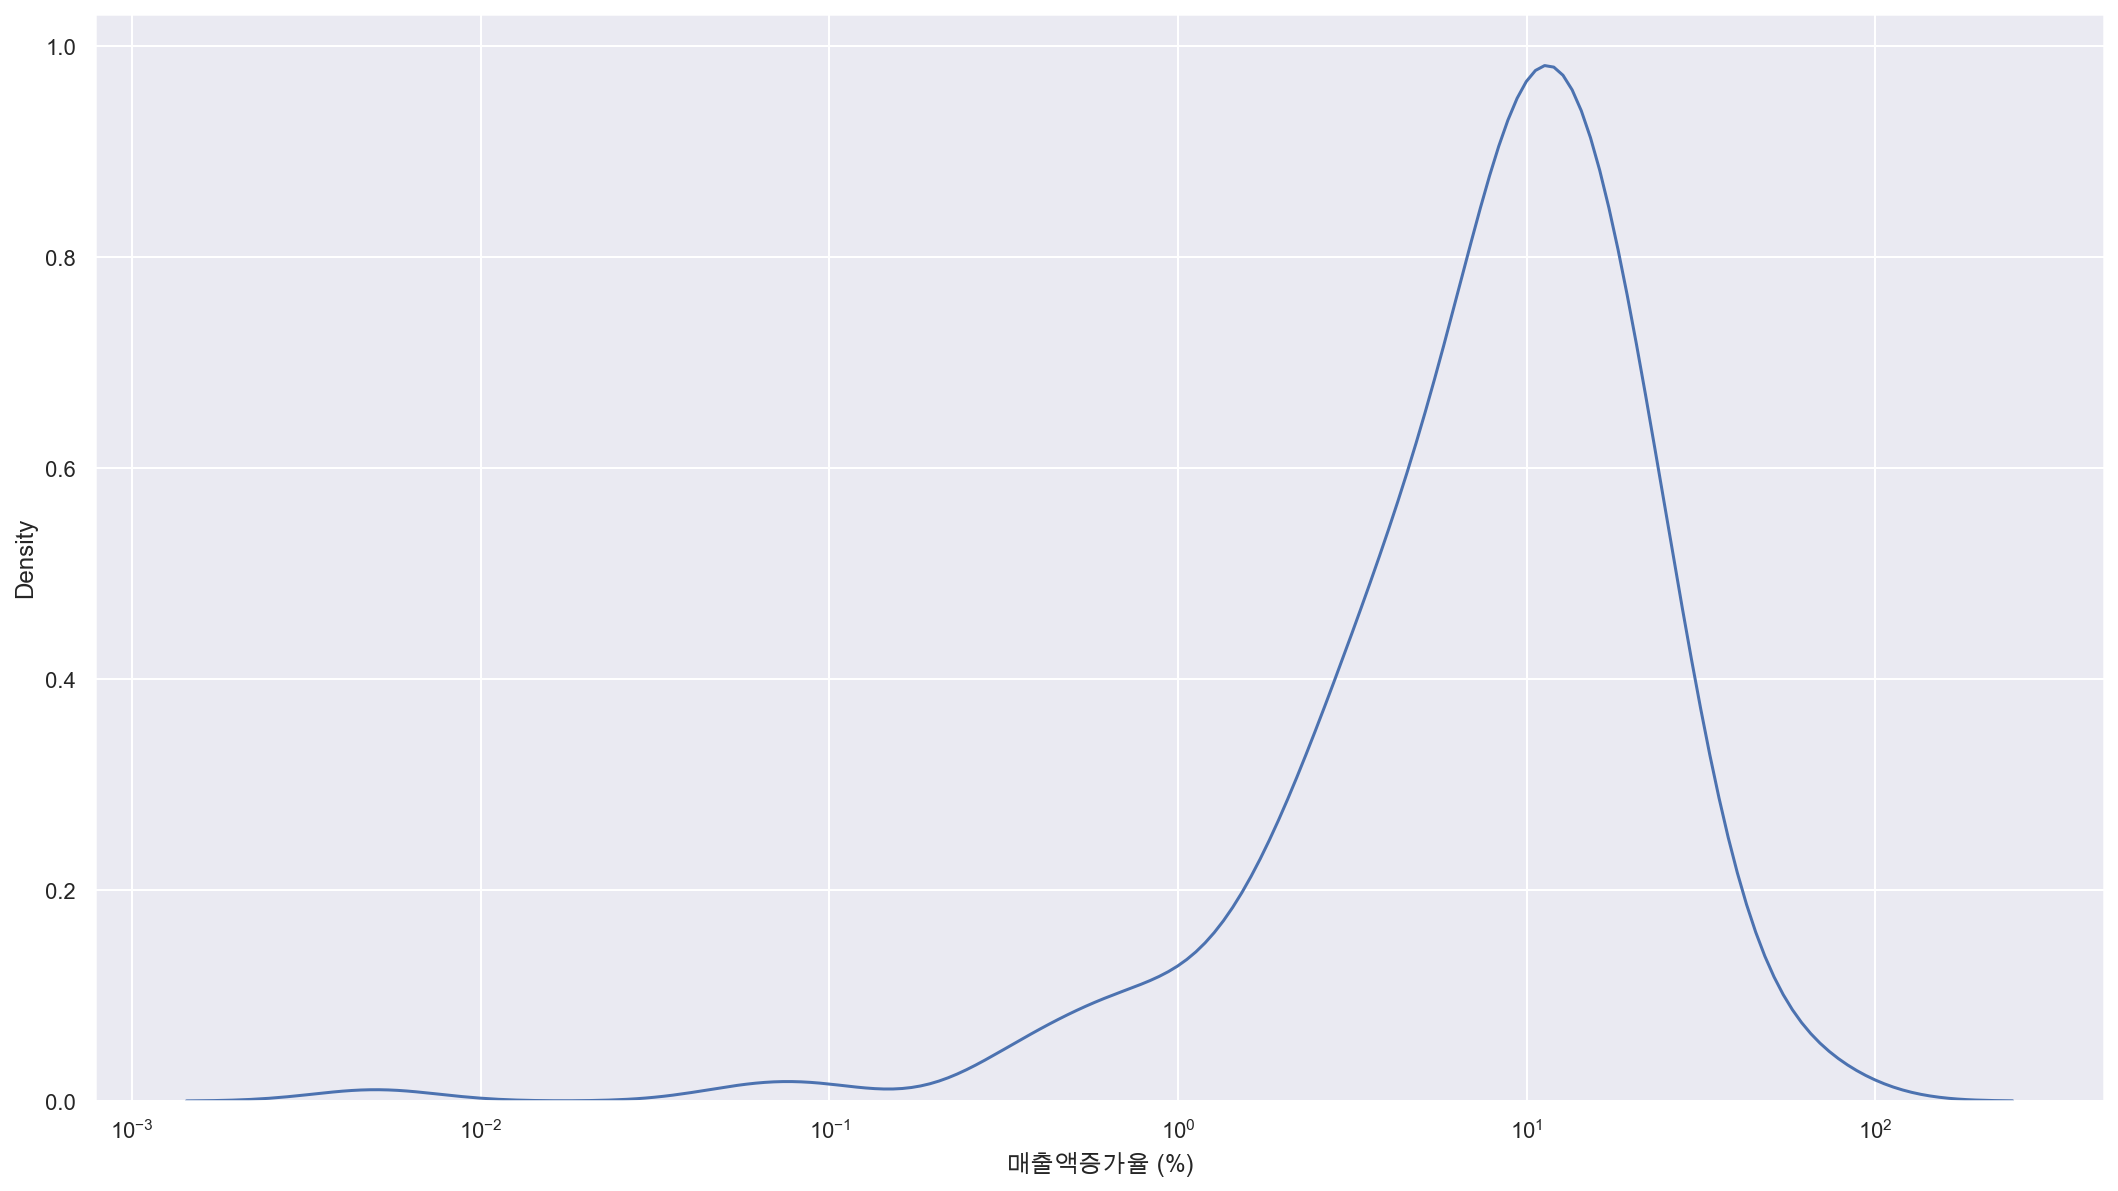

In [80]:
sns.kdeplot(data=df_no_manuf, x="매출액증가율 (%)", log_scale=True)
plt.show()

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


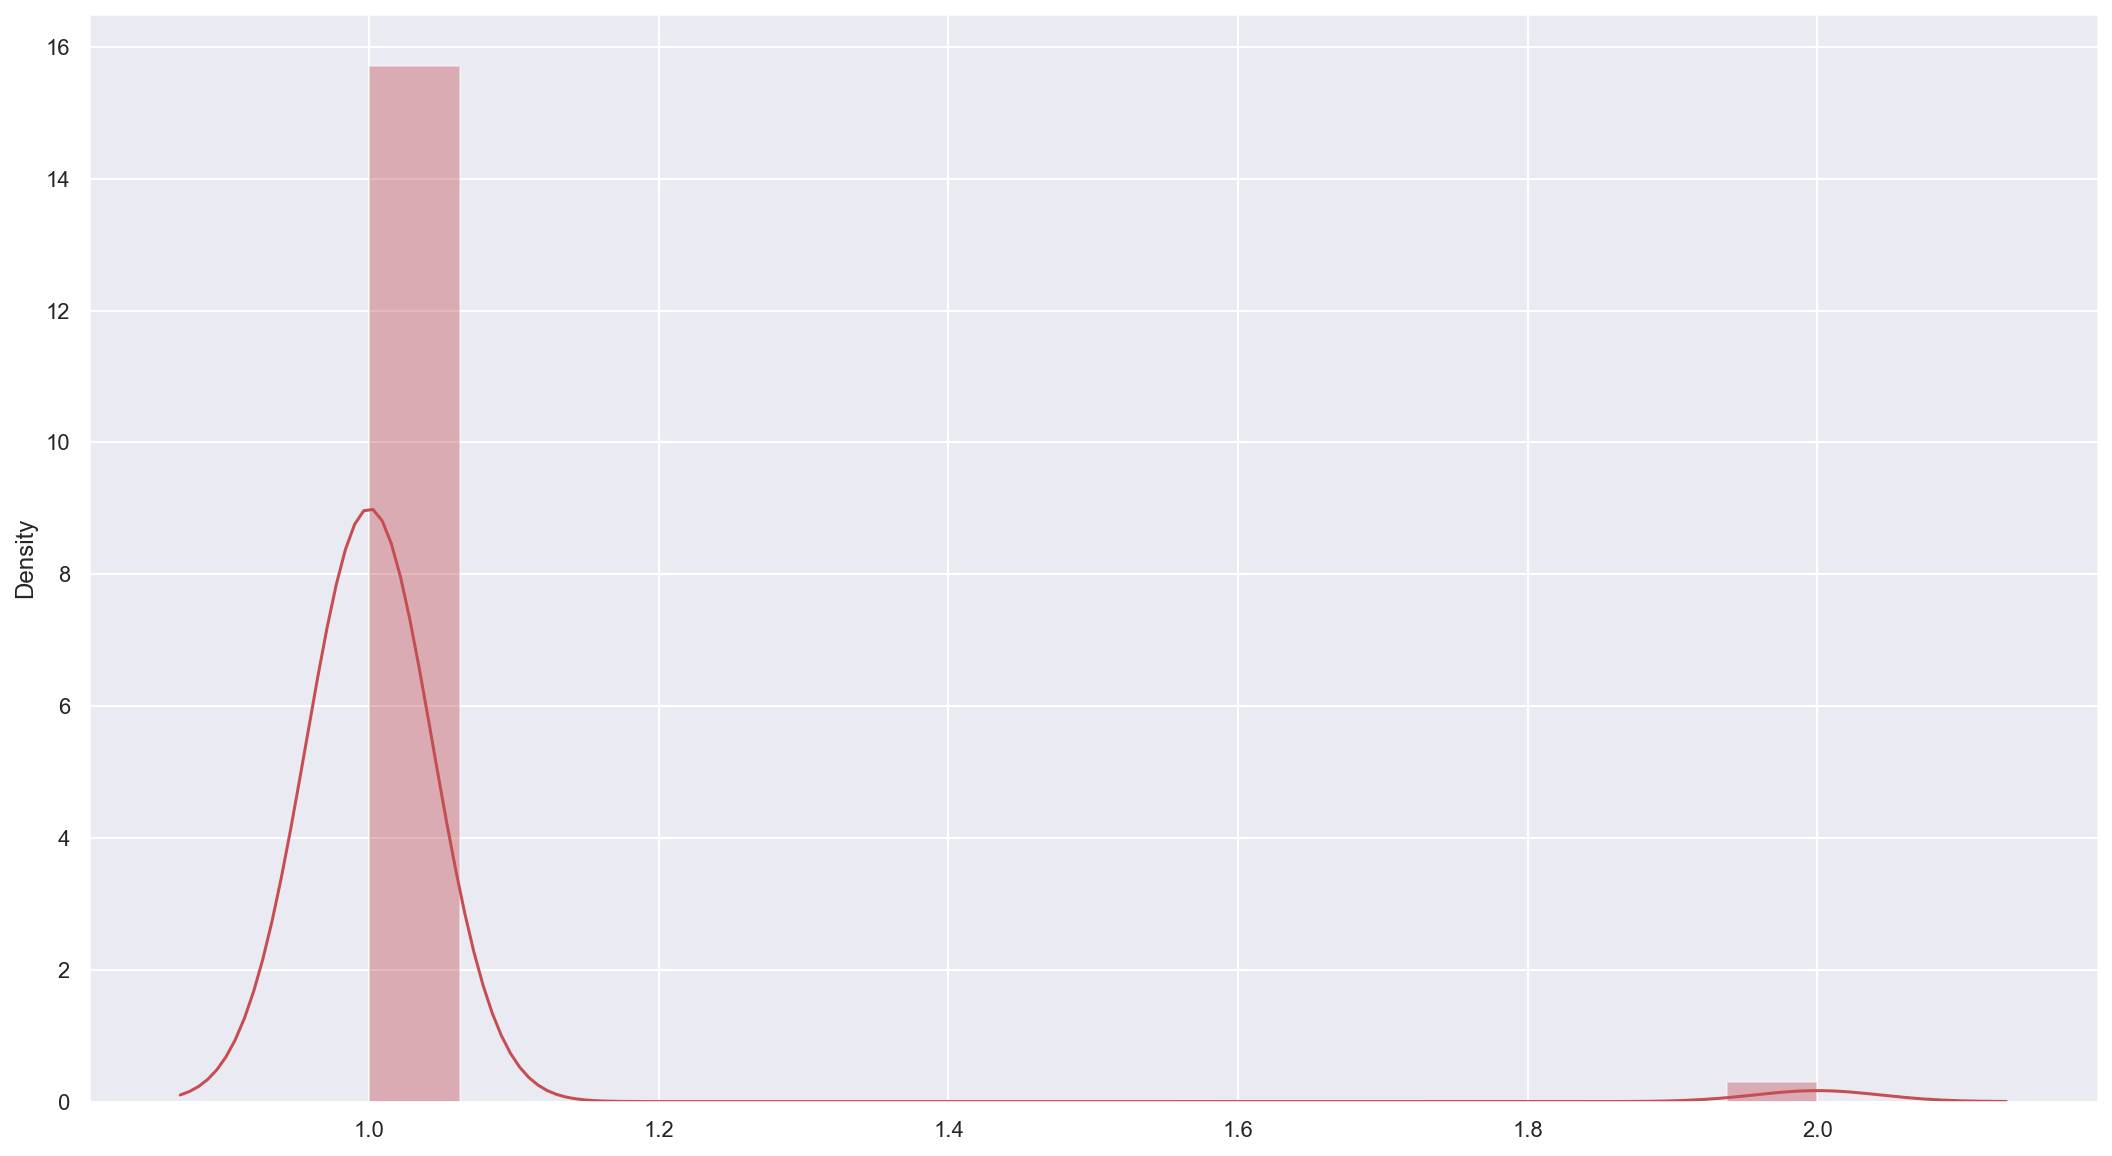

In [81]:
sns.distplot(df_no_manuf['매출액경상이익률 (%)'].value_counts().values,color='r')
plt.show()

## 

In [85]:
industry_ls = df_no_manuf['산업분류'].unique().tolist()
industry_ls

['건설업',
 '광업',
 '기계',
 '기타제조업',
 '농업, 임업 및 어업',
 '비금속광물',
 '서비스업',
 '섬유의복',
 '운수장비',
 '운수창고업',
 '유통업',
 '음식료품',
 '의료·정밀기기',
 '의약품',
 '전기가스',
 '전기전자',
 '종이·목재',
 '철강금속',
 '통신업',
 '화학']

In [90]:
for idx, sector in enumerate(industry_ls):
    globals()['df_ind_{}'.format(idx)] = df_no_manuf[df_no_manuf['산업분류'] == sector]

df_ind_19.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
266,화학,2005,122,79172951,5806567,6521011,7892710,20.22,4.75,57.31,6.57,9.75,6.91,195208733,48765040
267,화학,2006,126,89498479,5487722,5616017,7095298,24.31,2.29,37.34,3.98,5.64,4.47,209121677,57700526
268,화학,2007,124,70123432,3094422,3653376,4349643,-3.34,2.29,28.96,3.98,4.83,4.12,230778186,89716284
269,화학,2008,128,79343281,4019782,5169936,5441610,14.79,0.65,20.46,1.72,1.81,1.92,293333697,56040654
270,화학,2009,132,149072716,3813664,9108955,4641461,53.46,1.60,33.58,2.54,4.25,3.00,259758087,90579656


In [ ]:
df_no_m_pivot = df_no_manuf.pivot('년도','산업분류','매출액 (백만원)')

In [83]:
df_no_manuf['건설업'].plot(x='년도',y='매출액경상이익률 (%)')

KeyError: '건설업'

In [66]:
df_no_m_pivot = df_no_manuf.pivot('년도','산업분류','매출액 (백만원)')
df_no_m_pivot

산업분류,건설업,광업,기계,기타제조업,"농업, 임업 및 어업",비금속광물,서비스업,섬유의복,운수장비,운수창고업,유통업,음식료품,의료·정밀기기,의약품,전기가스,전기전자,종이·목재,철강금속,통신업,화학
년도,,,,,,,,,,,,,,,,,,,,
2005,40785394,46805,13957258,4431969,798101,5980730,14877863,7033623,84443363,27245891,63244461,20929444,2790158,5739365,37455938,139669118,6110764,48931072,34867457,79172951
2006,44745972,36613,14957716,4185753,767165,5860506,17884684,6683560,90579378,27937201,64512437,20651663,3234584,6403478,41945257,139108840,6050643,52664048,36542643,89498479
2007,47834524,17867,15832506,4430452,809516,5938447,50772955,6710722,95335759,26815975,76916343,19079848,3754147,6986060,46448135,142517552,5171379,54341117,33961333,70123432
2008,53570702,15150,18989947,4525461,931107,6468211,34673541,7163123,106524688,30783523,83717972,18618990,4421062,7992406,50757550,152065131,6084203,61323891,36094127,79343281
2009,61989084,18591,21535601,4867264,1236595,7305882,31259983,7122594,122413812,52889511,101836620,22616294,3512079,9107933,63225517,169398673,7080204,79499615,34411221,149072716
2010,67304651,497802,23554975,4986789,1281287,7760572,35249236,7740088,132240197,35145762,100105979,25195008,1174777,9449859,61708862,206392124,7243348,72271760,37827107,134845542
2011,66947521,574186,26898192,5070527,1532803,8129996,85200986,8035498,149481673,43067035,117568465,24817331,1460416,9721139,73395122,240817489,8179392,89559364,46203739,117723438
2012,65370539,16211,30175792,5402225,1613969,9456443,45982995,9062974,178863643,54237431,140829077,28919165,1534064,11661461,84407141,249149845,8648251,107725203,48913094,151992094
2013,66066321,10812,31403457,5507402,1966685,9623039,49445416,8727719,182695240,58949881,149305827,33716486,1766400,11839176,99154661,276912700,8317745,101383791,49581279,149935872


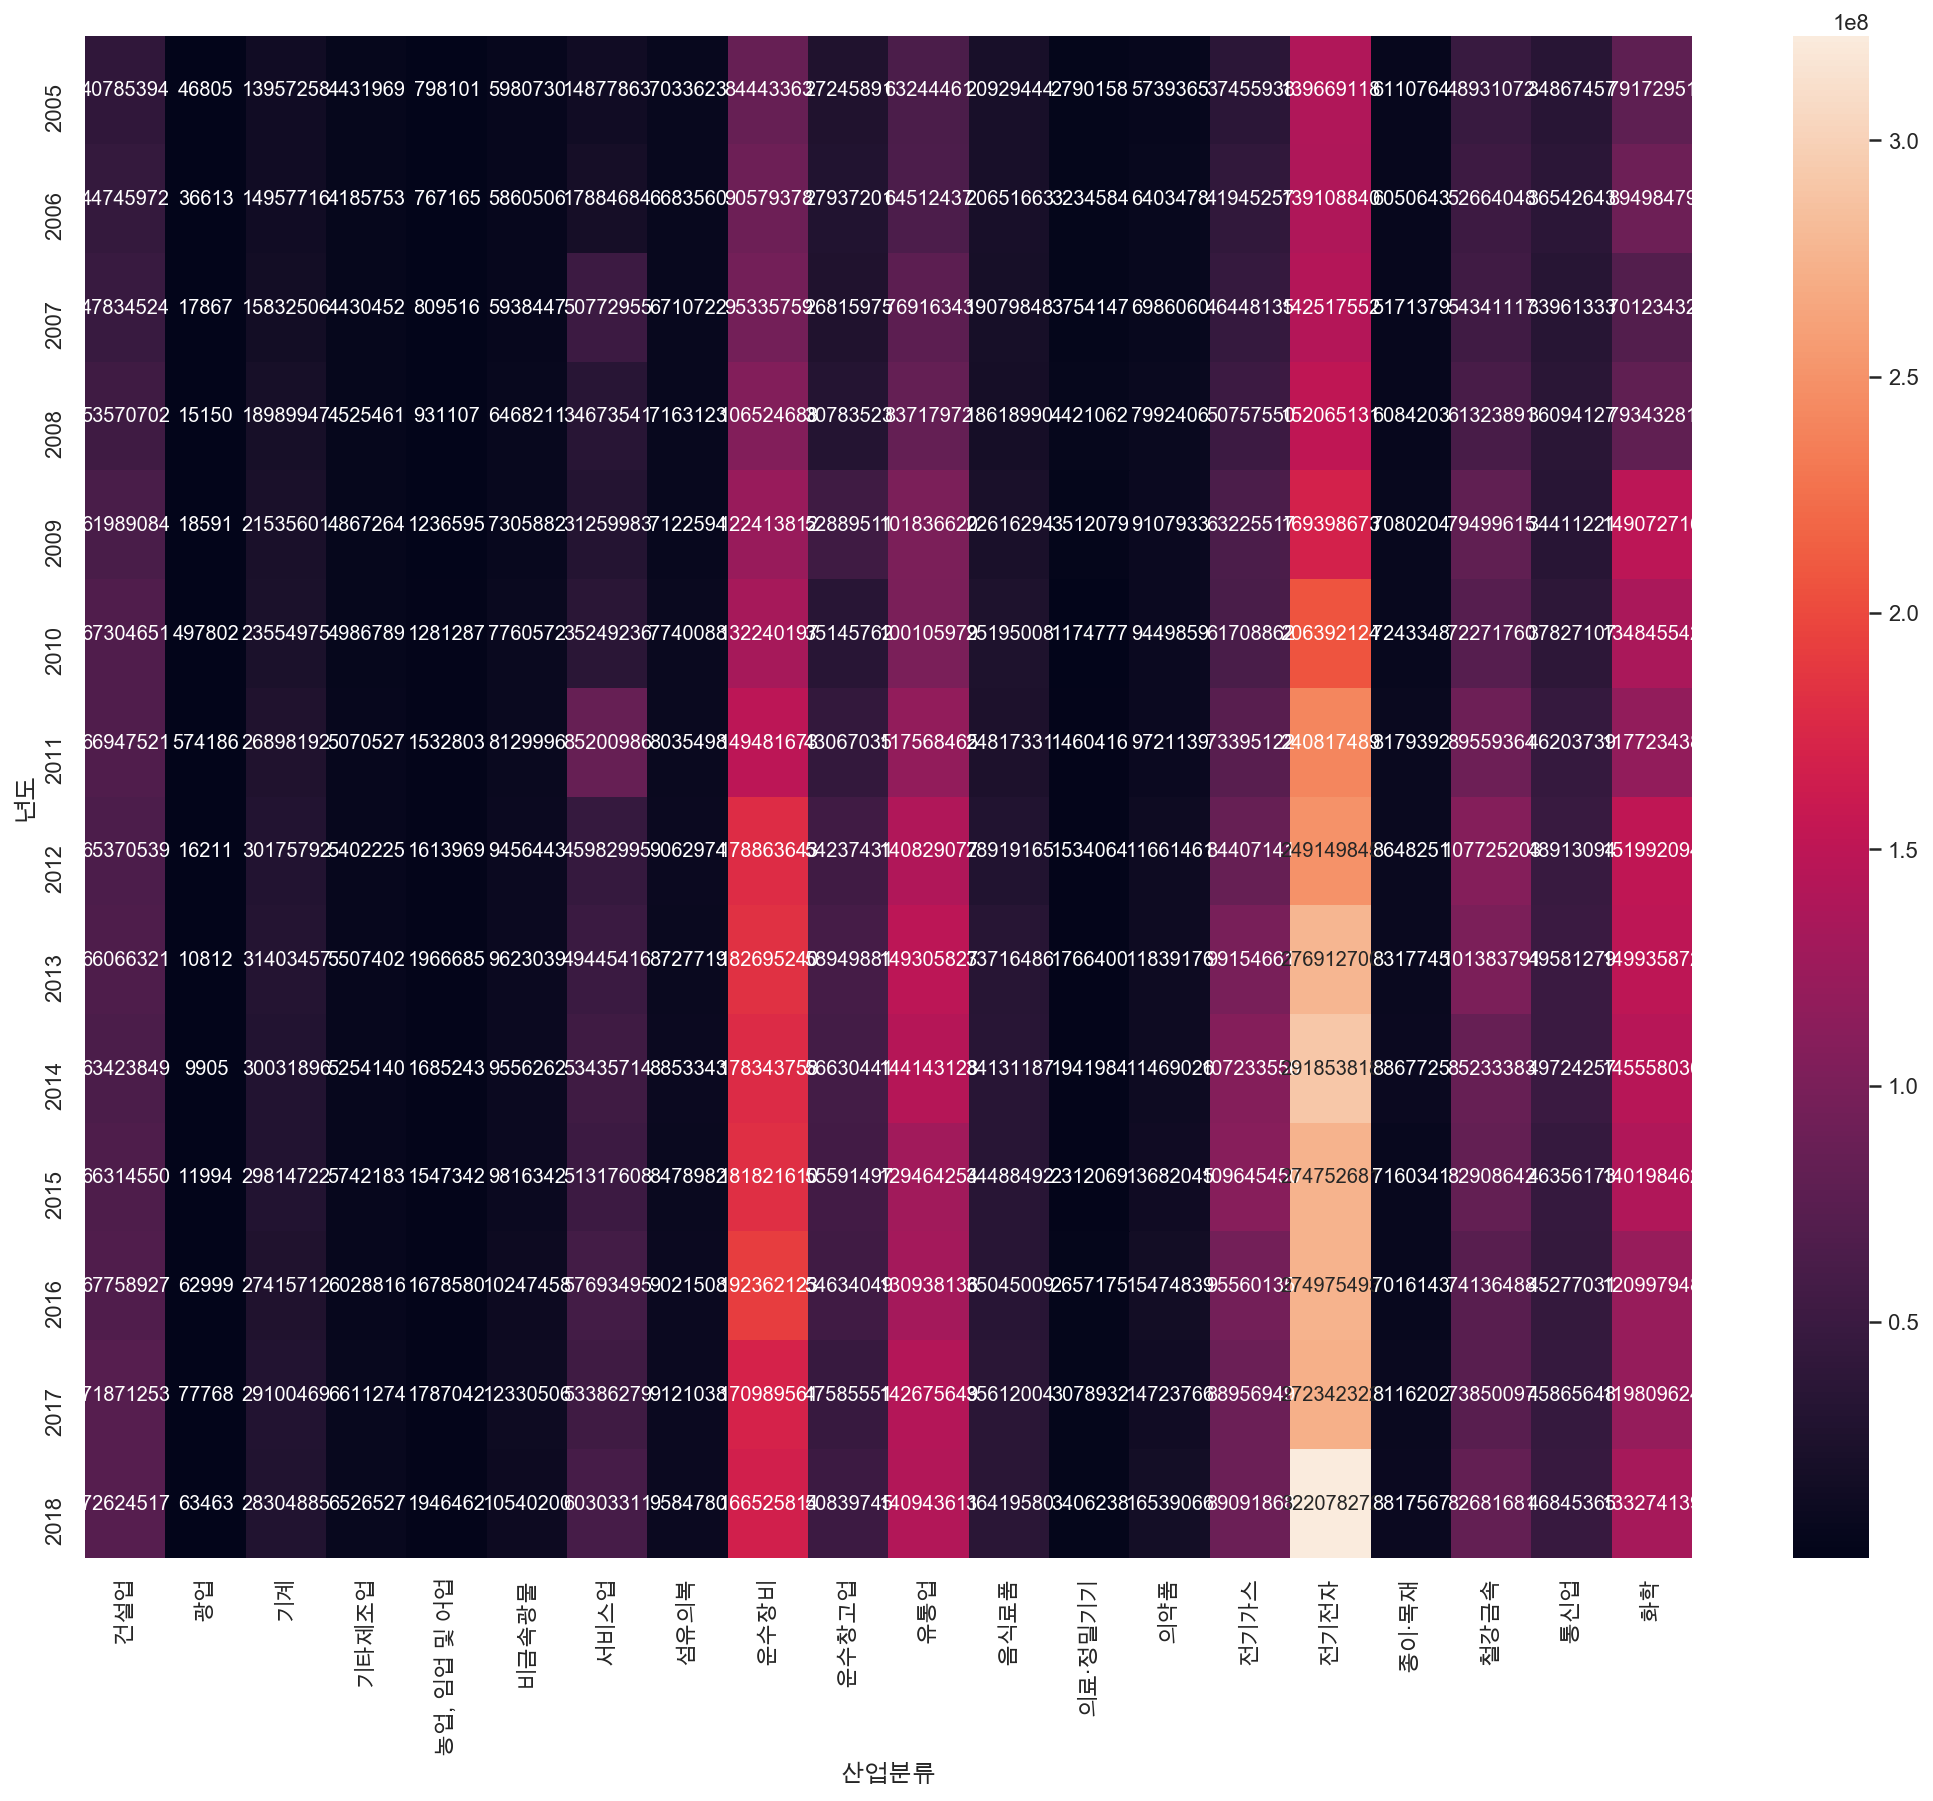

In [67]:
plt.figure(figsize=(18,14))
sns.heatmap(df_no_m_pivot, annot=True, fmt="d")
plt.show()

In [ ]:
plt.plot(df_norm_ind_0['년도'], df_norm_ind_0['매출액 (백만원)'], 'r--', 
        df_norm_ind_0['년도'], df_norm_ind_0['영업이익 (백만원)'], 'bs-', 
        df_norm_ind_0['년도'], df_norm_ind_0['시장규모'], 'g^-',
        df_norm_ind_0['년도'], df_norm_ind_0['시총'], 'b' )

## 3. 스케일링

### 1. Max 값으로 나누기

- 증가율 등의 비율은 최대값 100
- int 값은 최대값 1

In [68]:
df.columns

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [69]:
col_int = ['회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)','경상이익 (백만원)','시장규모', '시총']

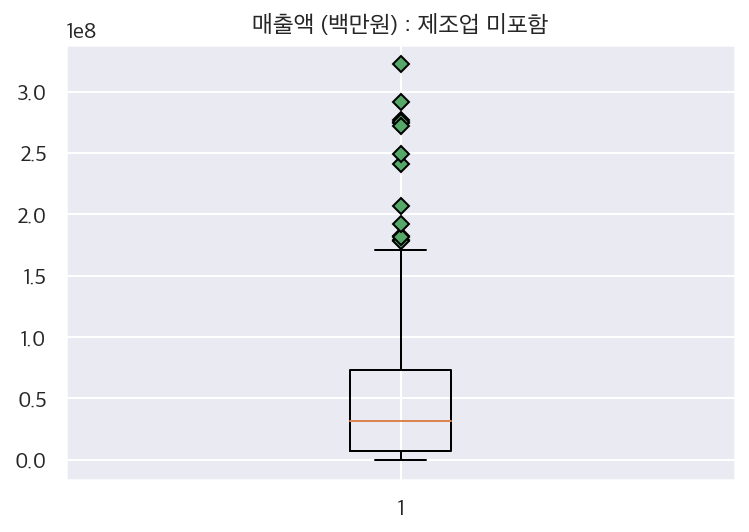

In [72]:
plt.boxplot(df_not_manuf['매출액 (백만원)'], flierprops={'markerfacecolor':'g', 'marker':'D'})
plt.title("매출액 (백만원) : 제조업 미포함")
plt.show();

In [54]:
df_not_manuf.describe()

,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
count,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00,280.00
mean,2011.50,80.96,52252475.04,2573465.31,3291910.55,3235570.81,6.28,1.41,35.40,2.53,3.05,2.99,174817554.00,60208279.91
std,4.04,91.60,61637157.41,4648512.65,5209440.00,5720603.61,13.09,12.08,48.59,16.28,8.15,4.84,296737419.66,94134483.56
min,2005.00,1.00,9905.00,-3131102.00,-2790523.00,-3773457.00,-54.67,-101.61,-246.01,-192.49,-80.36,-41.37,13498180.00,17704.00
25%,2008.00,25.00,7029253.00,102121.75,325269.50,159103.75,-0.31,0.67,10.26,1.70,1.08,1.49,51231823.50,7135666.00
50%,2011.50,52.00,31331720.00,868956.50,1454992.00,1196967.00,5.63,2.91,35.61,4.03,4.21,3.27,100558517.50,26089872.50
75%,2015.00,105.00,73508865.75,3425192.75,4480067.50,4522048.75,12.64,5.16,58.92,7.06,7.05,5.30,174977898.75,62009428.25
max,2018.00,402.00,322078272.00,43096388.00,53484228.00,54785449.00,71.08,19.77,245.78,48.33,16.56,16.45,1999044945.00,552931593.00


In [53]:
df_not_manuf[df_not_manuf['매출액 (백만원)'] >= 200000000]
## 전기전자도 높음

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
215,전기전자,2010,348,206392124,13813397,11540675,15841438,24.89,1.35,34.77,2.28,2.29,2.24,166994724,267195948
216,전기전자,2011,343,240817489,17639762,18060310,19012124,-1.40,2.08,41.79,2.68,3.40,2.64,192298177,256524351
217,전기전자,2012,340,249149845,9969682,10907629,11458015,5.51,1.98,34.51,2.67,3.25,2.58,186498423,342657896
218,전기전자,2013,342,276912700,19354908,20833745,24431517,7.42,1.71,40.03,2.78,2.89,2.91,177195647,329574843
219,전기전자,2014,344,291853818,20406779,27160294,27539409,2.40,2.17,44.13,3.29,3.16,3.24,183113139,333098542
220,전기전자,2015,354,274752681,19690073,22066483,24201261,-0.25,3.76,51.86,3.29,4.89,3.01,171393989,319499994
221,전기전자,2016,367,274975493,17961247,20988181,21812117,3.39,1.70,34.21,2.60,2.13,2.25,175277817,407869990
222,전기전자,2017,364,272342322,15896372,18774955,19206881,12.55,2.03,37.28,2.98,2.66,2.69,185943216,552931593
223,전기전자,2018,376,322078272,43096388,53484228,54785449,3.56,3.55,83.29,5.19,4.58,4.39,179858321,401461760


In [105]:
df_not_manuf_norm = pd.DataFrame(columns=df_not_manuf.columns, index=df_not_manuf.index.values)

In [130]:
df_not_manuf_norm = pd.DataFrame(columns=df_not_manuf.columns, index=df_not_manuf.index.values)
df_not_manuf_norm.iloc[:,:2] = df_not_manuf.iloc[:,:2]
df_not_manuf_norm.iloc[:,2:] = df_not_manuf.iloc[:,2:] / df_not_manuf.iloc[:,2:].max()
df_not_manuf_norm

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,0.13,0.13,0.05,0.06,0.05,0.05,0.25,0.15,0.14,0.80,0.48,0.08,0.05
1,건설업,2006,0.14,0.14,0.06,0.07,0.07,0.17,0.30,0.19,0.16,0.89,0.54,0.08,0.06
2,건설업,2007,0.14,0.15,0.07,0.07,0.07,0.07,0.25,0.16,0.14,0.68,0.39,0.08,0.10
3,건설업,2008,0.14,0.17,0.07,0.07,0.08,0.23,0.21,0.15,0.13,0.59,0.33,0.09,0.04
4,건설업,2009,0.14,0.19,0.04,0.06,0.05,0.26,0.11,0.10,0.07,0.35,0.19,0.09,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,화학,2014,0.34,0.45,0.08,0.11,0.10,-0.01,0.17,0.23,0.09,0.34,0.28,0.18,0.18
276,화학,2015,0.35,0.44,0.08,0.10,0.09,-0.03,0.19,0.22,0.11,0.33,0.29,0.14,0.27
277,화학,2016,0.36,0.38,0.14,0.17,0.15,-0.03,0.27,0.31,0.15,0.43,0.36,0.14,0.26
278,화학,2017,0.36,0.37,0.21,0.22,0.21,0.06,0.24,0.34,0.13,0.37,0.31,0.16,0.32


### 타입변경
- 오브젝트 타입은 plot이 안됩니다~

In [150]:
df_not_manuf_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   산업분류          280 non-null    object 
 1   년도            280 non-null    object 
 2   회사수 (개)       280 non-null    float64
 3   매출액 (백만원)     280 non-null    float64
 4   당기순이익 (백만원)   280 non-null    float64
 5   영업이익 (백만원)    280 non-null    float64
 6   경상이익 (백만원)    280 non-null    float64
 7   매출액증가율 (%)    280 non-null    float64
 8   매출액이익률 (%)    280 non-null    float64
 9   납입자본이익률 (%)   280 non-null    float64
 10  매출액경상이익률 (%)  280 non-null    float64
 11  자기자본이익률 (%)   280 non-null    float64
 12  총자본경상이익률 (%)  280 non-null    float64
 13  시장규모          280 non-null    float64
 14  시총            280 non-null    float64
dtypes: float64(13), object(2)
memory usage: 35.0+ KB


In [148]:
## df_not_manuf_norm.iloc[:,2:] = df_not_manuf_norm.iloc[:,2:].astype('float')
## 위와 같은 방법이 안되는 이유는 iloc이 view를 만드는 거라서 astype 이 적용이 안되는?
df_not_manuf_norm[df_not_manuf_norm.columns[2:]] = df_not_manuf_norm.iloc[:,2:].astype('float')

### 2. 표준화 standardization

In [2]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
df_values = df.iloc[:,2:]

In [22]:
fitted = std_scaler.fit(df_values)
print(fitted.mean_)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
# output = std_scaler.transform(df)
# output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
# print(output.head())


[1.28765306e+02 8.12661225e+07 4.31024978e+06 5.37536088e+06
 5.41298083e+06 6.34005574e+00 1.50456916e+00 3.57117380e+01
 2.64710837e+00 3.09808768e+00 3.02837774e+00 2.31549176e+08
 9.09689361e+07]


In [66]:
df_not_manuf = df[df['산업분류'] != '제조업']
df_not_manuf['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학'], dtype=object)

In [112]:
df_not_manuf_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   산업분류          280 non-null    object
 1   년도            280 non-null    object
 2   회사수 (개)       280 non-null    object
 3   매출액 (백만원)     280 non-null    object
 4   당기순이익 (백만원)   280 non-null    object
 5   영업이익 (백만원)    280 non-null    object
 6   경상이익 (백만원)    280 non-null    object
 7   매출액증가율 (%)    280 non-null    object
 8   매출액이익률 (%)    280 non-null    object
 9   납입자본이익률 (%)   280 non-null    object
 10  매출액경상이익률 (%)  280 non-null    object
 11  자기자본이익률 (%)   280 non-null    object
 12  총자본경상이익률 (%)  280 non-null    object
 13  시장규모          280 non-null    object
 14  시총            280 non-null    object
dtypes: object(15)
memory usage: 35.0+ KB


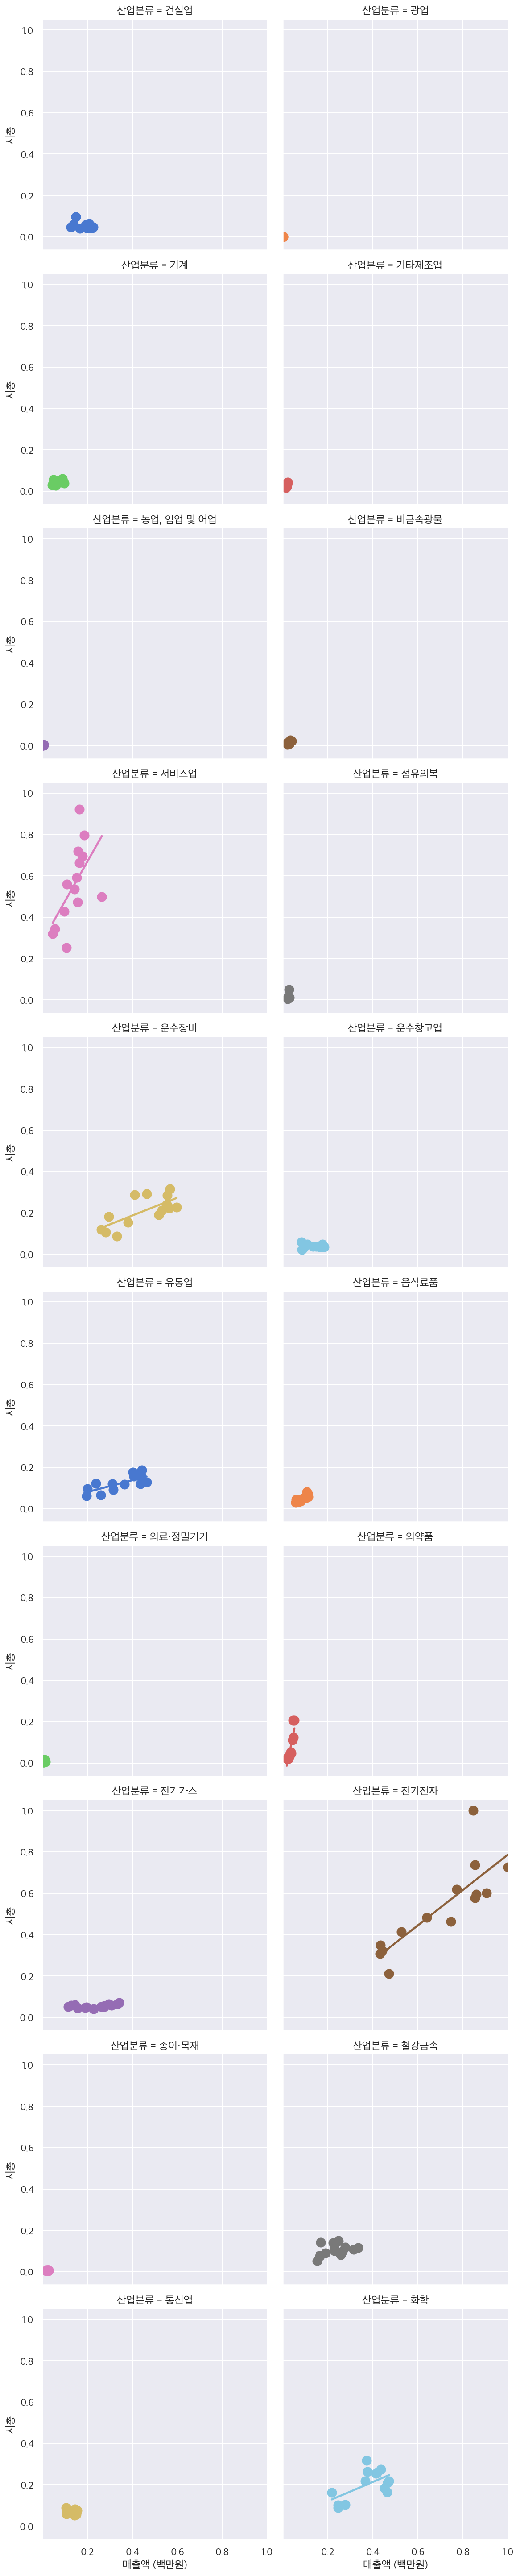

In [151]:
sns.lmplot(x="매출액 (백만원)", y="시총", col="산업분류", hue="산업분류", data=df_not_manuf_norm,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 100, "alpha": 1})

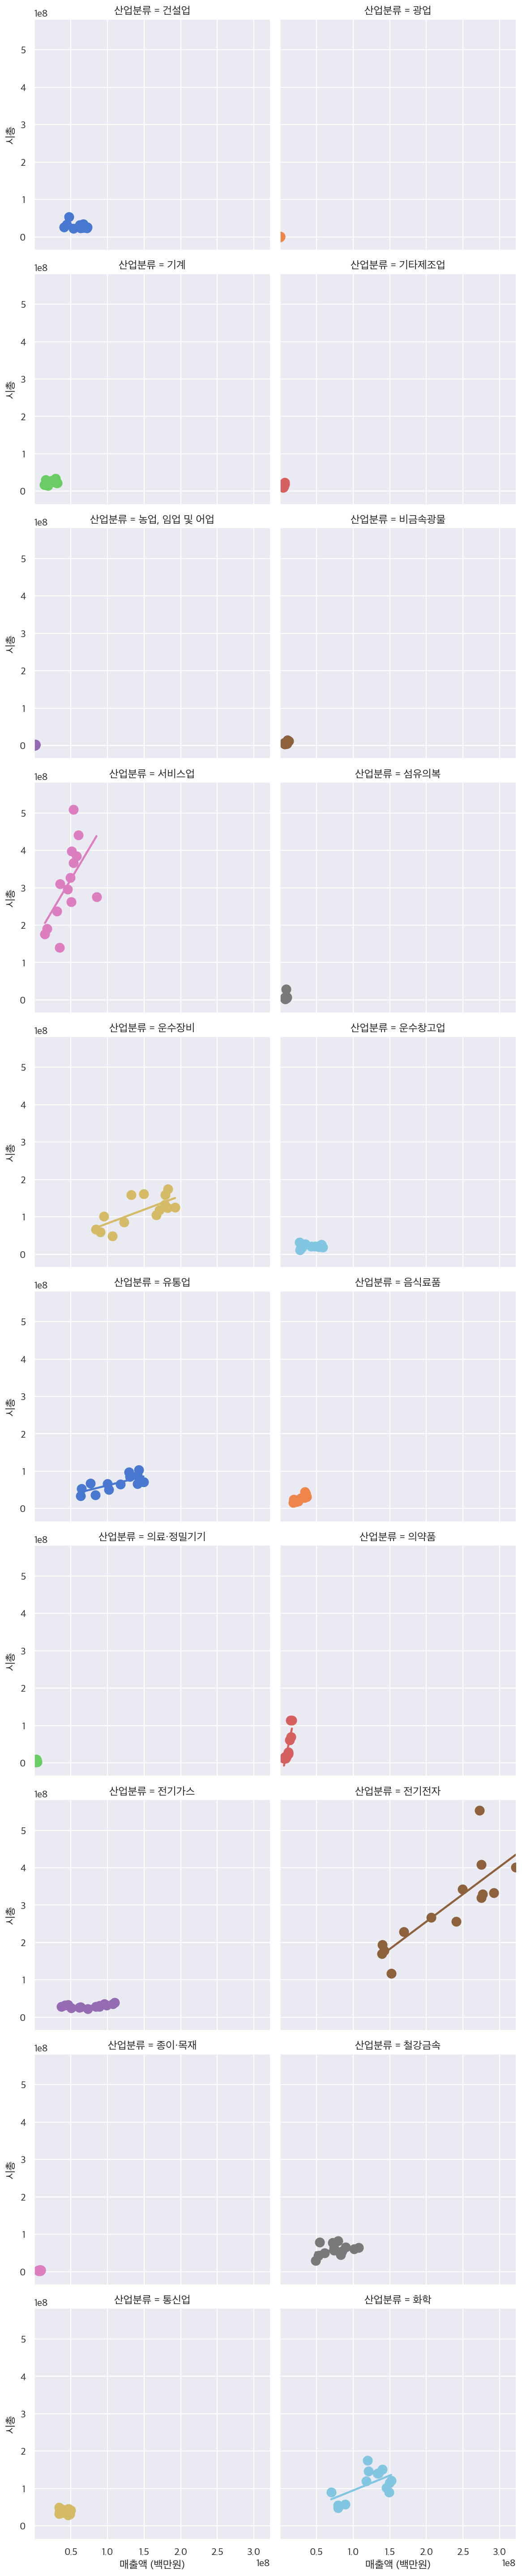

In [111]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="매출액 (백만원)", y="시총", col="산업분류", hue="산업분류", data=df_not_manuf,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 100, "alpha": 1})

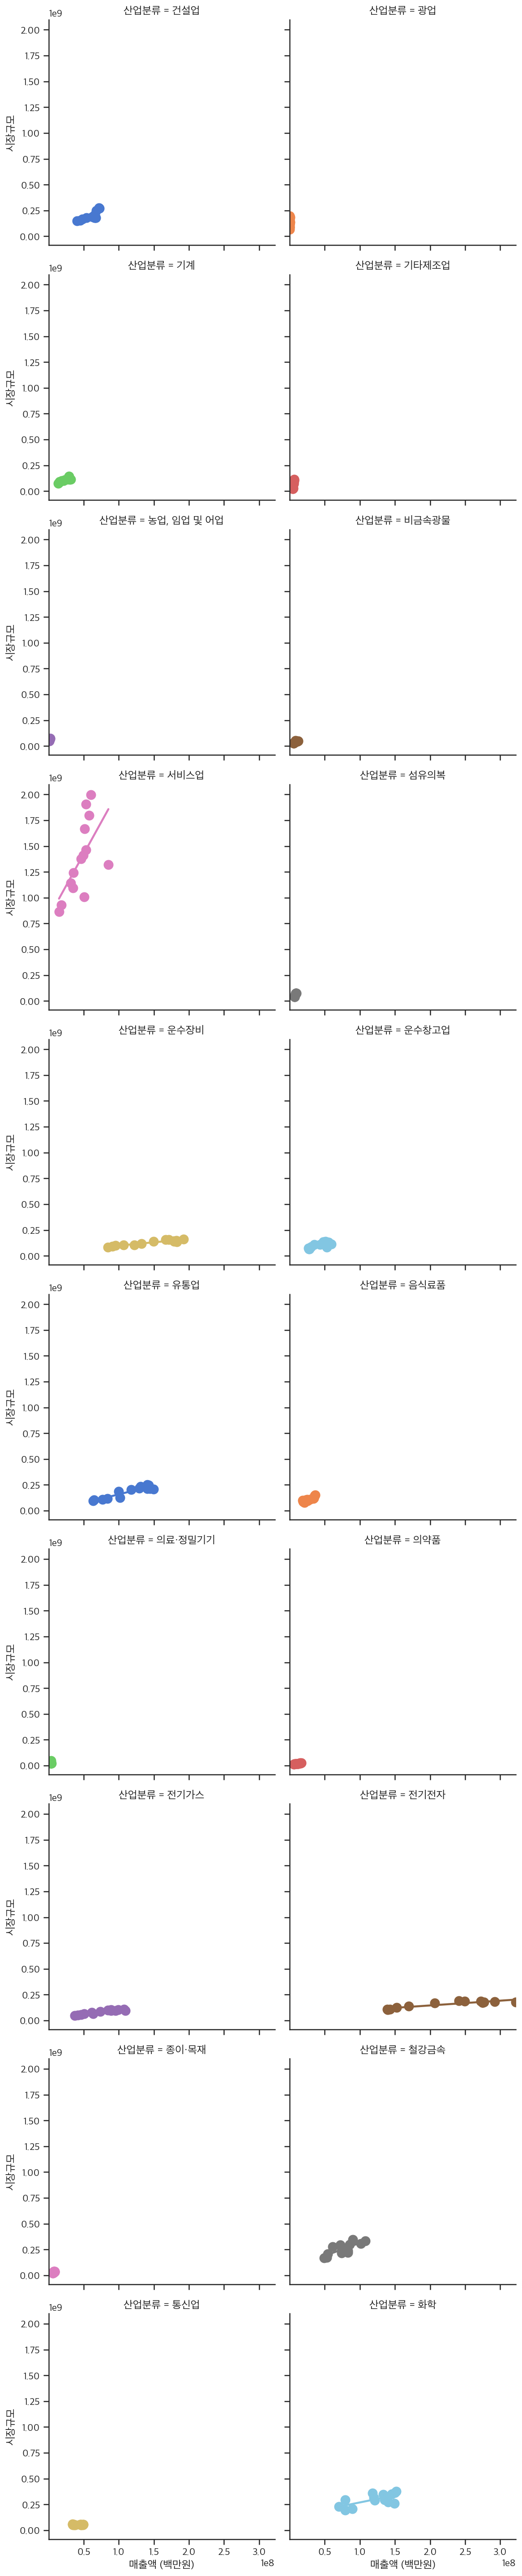

In [70]:
sns.lmplot(x="매출액 (백만원)", y="시장규모", col="산업분류", hue="산업분류", data=df_not_manuf,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 100, "alpha": 1})

In [81]:
df_not_manuf.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [79]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [87]:
plt.rcParams['figure.figsize'] = 16,8

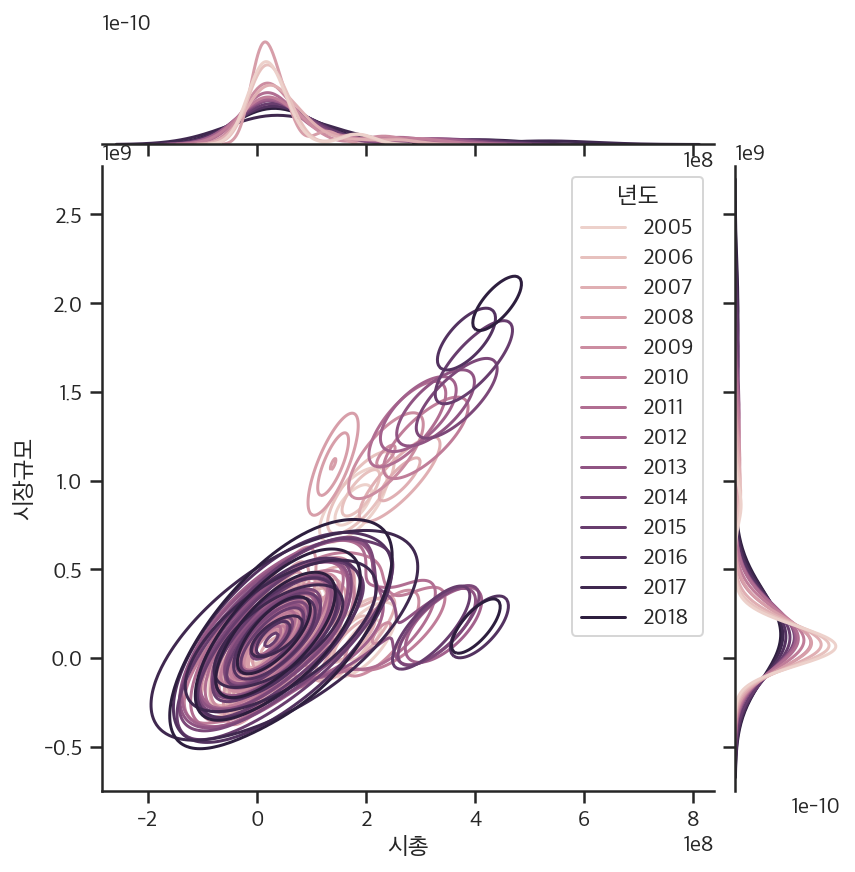

In [100]:
import seaborn as sns
# sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df_not_manuf,
    x="시총", y="시장규모", hue="년도",
    kind="kde",
)

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [101]:
df_not_manuf = df_not_manuf.drop(columns=[''])
df_not_manuf.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104
